# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
%matplotlib inline

from library.sb_utils import save_file

In [2]:
# import data
wnv = pd.read_csv('../data/WestNileVirus.csv')
wnv.head()

Trap  Block   Latitude  Longitude        Date                 Species  \
0  T001     40  41.953705 -87.733974  2007-06-26  CULEX PIPIENS/RESTUANS   
1  T001     40  41.953705 -87.733974  2007-07-11  CULEX PIPIENS/RESTUANS   
2  T001     40  41.953705 -87.733974  2007-07-18           CULEX PIPIENS   
3  T001     40  41.953705 -87.733974  2007-08-01           CULEX PIPIENS   
4  T001     40  41.953705 -87.733974  2007-08-01  CULEX PIPIENS/RESTUANS   

   AddressAccuracy  NumMosquitos  Day_of_week  Day_of_month  ...  PrecipTotal  \
0                8             1            1            26  ...       0.0805   
1                8             1            2            11  ...       0.0000   
2                8             1            2            18  ...       1.2350   
3                8             1            2             1  ...       0.0000   
4                8             3            2             1  ...       0.0000   

   StnPressure  SeaLevel ResultSpeed ResultDir AvgSpeed RelativeHumidity  \
0       29.420    30.100        6.70      21.5     7.60            65.89   
1       29.255    29.925        8.95      30.0    11.05            51.35   
2       29.145    29.835        9.70      24.0    10.35            75.08   
3       29.315    29.990        2.80      11.0     3.90            54.77   
4       29.315    29.990        2.80      11.0     3.90            54.77   

   DewPointDepression  WetBulbDepression  WnvPresent  
0               12.50               9.50           0  
1               18.75              10.75           0  
2                8.50               6.00           0  
3               17.75              10.75           0  
4               17.75              10.75           0  

[5 rows x 36 columns]

In [3]:
wnv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8610 entries, 0 to 8609
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trap                8610 non-null   object 
 1   Block               8610 non-null   int64  
 2   Latitude            8610 non-null   float64
 3   Longitude           8610 non-null   float64
 4   Date                8610 non-null   object 
 5   Species             8610 non-null   object 
 6   AddressAccuracy     8610 non-null   int64  
 7   NumMosquitos        8610 non-null   int64  
 8   Day_of_week         8610 non-null   int64  
 9   Day_of_month        8610 non-null   int64  
 10  Week                8610 non-null   int64  
 11  Month               8610 non-null   int64  
 12  Year                8610 non-null   int64  
 13  Season              8610 non-null   object 
 14  Month_Name          8610 non-null   object 
 15  Sunrise             8610 non-null   object 
 16  Sunset

In [4]:
# convert 'Date' column to datetime
wnv['Date'] = pd.to_datetime(wnv['Date'], format="%Y/%m/%d")

# convert 'Sunrise' column to datetime
wnv['Sunrise'] = wnv['Sunrise'].astype(str)
wnv['Sunrise'] = wnv['Sunrise'].str[7:12]
wnv['Sunrise'] = pd.to_datetime(wnv['Sunrise'],format='%H:%M')-pd.to_datetime('1900-01-01 00:00:00')

# convert 'Sunset' column to datetime
wnv['Sunset'] = wnv['Sunset'].astype(str)
wnv['Sunset'] = wnv['Sunset'].str[7:12]
wnv['Sunset'] = pd.to_datetime(wnv['Sunset'],format='%H:%M')-pd.to_datetime('1900-01-01 00:00:00')

In [5]:
# wnv present
wnv1 = wnv[wnv['WnvPresent'] == 1]

wnv1_2007 = wnv1[wnv1['Year'] == 2007]
wnv1_2009 = wnv1[wnv1['Year'] == 2009]
wnv1_2011 = wnv1[wnv1['Year'] == 2011]
wnv1_2013 = wnv1[wnv1['Year'] == 2013]

# wnv not present
wnv0 = wnv[wnv['WnvPresent'] == 0]

wnv0_2007 = wnv0[wnv0['Year'] == 2007]
wnv0_2009 = wnv0[wnv0['Year'] == 2009]
wnv0_2011 = wnv0[wnv0['Year'] == 2011]
wnv0_2013 = wnv0[wnv0['Year'] == 2013]

Since our goal is to find out when and where to spray in the city, we should first look to see if there are any clear parterns with the location and time variables we currently have. We will also want to examine how each variable relates to the presence of the virus.

In [6]:
# We know we only have data for 2007, 2009, 2011, and 2013. This function will make it easier to visualize the data.
def scatter(column, alpha=1):
    """This function creates 4 scatter plots with 'Date' on the x-axis and column on the y-axis.
    alpha controls the alpha for the WnvPresent=0
    
    Cases where the virus is present will be shown as a red 'x' while cases where the virus is absent will
    show as a blue '+'.
    """
    
    fig, ax = plt.subplots(1,4, figsize=(15,5), sharey=True)
    fig.suptitle('{} vs Time'.format(column))
    
    # 2007
    sns.scatterplot(ax=ax[0], data=wnv1_2007, x='Date', y=column, marker='x', color='red')
    sns.scatterplot(ax=ax[0], data=wnv0_2007, x='Date', y=column, marker='+', alpha=alpha)
    ax[0].set_title('2007')
    ax[0].tick_params(axis='x', labelrotation=45)

    # 2009
    sns.scatterplot(ax=ax[1], data=wnv1_2009, x='Date', y=column, marker='x', color='red')
    sns.scatterplot(ax=ax[1], data=wnv0_2009, x='Date', y=column, marker='+', alpha=alpha)
    ax[1].set_title('2009')
    ax[1].tick_params(axis='x', labelrotation=45)

    # 2011
    sns.scatterplot(ax=ax[2], data=wnv1_2011, x='Date', y=column, marker='x', color='red')
    sns.scatterplot(ax=ax[2], data=wnv0_2011, x='Date', y=column, marker='+', alpha=alpha)
    ax[2].set_title('2011')
    ax[2].tick_params(axis='x', labelrotation=45)

    # 2013
    sns.scatterplot(ax=ax[3], data=wnv1_2013, x='Date', y=column, marker='x', color='red')
    sns.scatterplot(ax=ax[3], data=wnv0_2013, x='Date', y=column, marker='+', alpha=alpha)
    ax[3].set_title('2013')
    ax[3].tick_params(axis='x', labelrotation=45)

    fig.legend(labels=['WnvPresent=1','WnvPresent=0'])
    fig.tight_layout()
    plt.show()

In [7]:
# dual histogram plot
# We will use this fucntion to quickly visualize and compare differences in a column where the virus is present and
# when the virus is absent. If the shapes of the histograms are fairly similar, then the particular column has little
# to no influence on the presence of the virus.
def dual_histplot(column, figsize=(15,5), bins=30, sharey=False):
    """This creates two histograms. One where WnvPresent=1 and one where WnvPresent=0 for the given column.
    """
    fig, ax = plt.subplots(1,2, figsize=(15,5),sharey=sharey, sharex=True)

    # WnvPresent=0
    sns.histplot(ax=ax[0], data=wnv0,  x=column, bins=bins)
    ax[0].set_title('{} Where WnvPresent=0'.format(column))

    # WnvPresent=1
    sns.histplot(ax=ax[1], data=wnv1,  x=column, bins=bins, color='red')
    ax[1].set_title('{} Where WnvPresent=1'.format(column))

    plt.show()

#### WnvPresent counts

In [115]:
wnv['WnvPresent'].value_counts(normalize=True)

0    0.946922
1    0.053078
Name: WnvPresent, dtype: float64

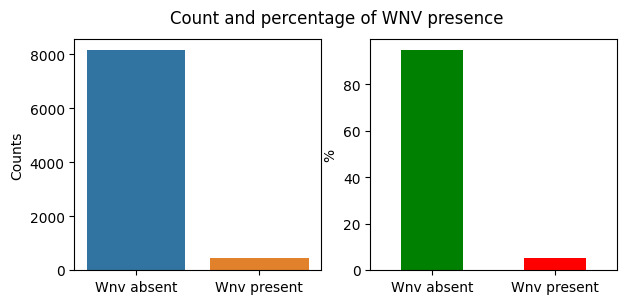

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3))
fig.suptitle('Count and percentage of WNV presence')
x = wnv.WnvPresent.replace(to_replace=[0, 1], value=['Wnv absent','Wnv present'])
#g1=sns.countplot(x=dftrain.WnvPresent.replace(to_replace=[0, 1], value=['Wnv absent','Wnv present']),ax=ax[0])
g1=sns.countplot(x=x,ax=ax[0])
g1.set(ylabel='Counts')
g1.set(xlabel=None)


y = x.value_counts()*100/len(wnv.WnvPresent)
#g2=y.replace(to_replace=[0, 1], value=['Wnv absent','Wnv present']).plot(kind='bar', color=('g', 'r'),figsize=(5, 5))
g2 = y.replace(to_replace=[0, 1], value=['Wnv absent','Wnv present']).plot(kind='bar', color=('g', 'r'))
plt.ylabel('%')
g2.set_xticklabels(g2.get_xticklabels(), rotation=0)

plt.savefig('../images/WNV_percentage.png', bbox_inches='tight')
plt.show()

#### Latitude and Longitude

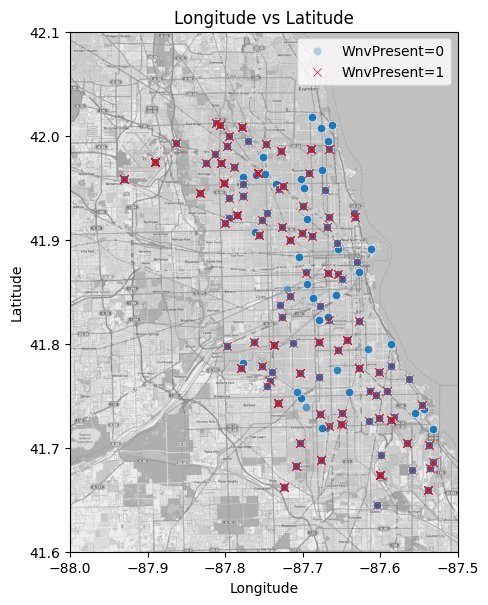

In [9]:
mapdata = np.loadtxt("../raw_data/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(5,7))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)

sns.scatterplot(data=wnv0, x='Longitude', y='Latitude', marker='o', alpha=0.3)
sns.scatterplot(data=wnv1, x='Longitude', y='Latitude', marker='x', color='red')

plt.title('Longitude vs Latitude')
plt.legend(labels=['WnvPresent=0','WnvPresent=1'])

plt.savefig('../images/Map.png', bbox_inches='tight')
plt.show()

In [124]:
print('Latitude mean: {}'.format(wnv['Latitude'].mean()))
print('Longitude mean: {}'.format(wnv['Longitude'].mean()))

Latitude mean: 41.84442156411151
Longitude mean: -87.69523683228805


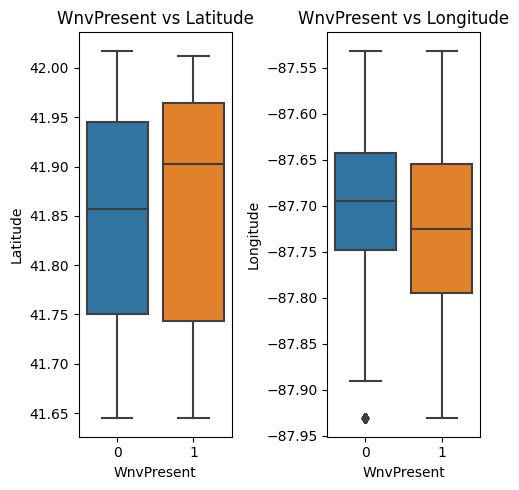

In [10]:
# Latitude and Longitude boxplots
fig, ax = plt.subplots(1,2, figsize=(5,5))

# Latitude
sns.boxplot(ax=ax[0], data=wnv, x='WnvPresent', y='Latitude')
ax[0].set_title('WnvPresent vs Latitude')

# Longitude
sns.boxplot(ax=ax[1], data=wnv, x='WnvPresent', y='Longitude')
ax[1].set_title('WnvPresent vs Longitude')

fig.tight_layout()

plt.savefig('../images/Lat_Long_spread.png', bbox_inches='tight')
plt.show()

We can see there is a slightly greater latitude mean with a higher variance for the presense of the virus as opposed to when the virus was not present. We can also see there is a lower longitudemean and higher variance for the presence of the virus.

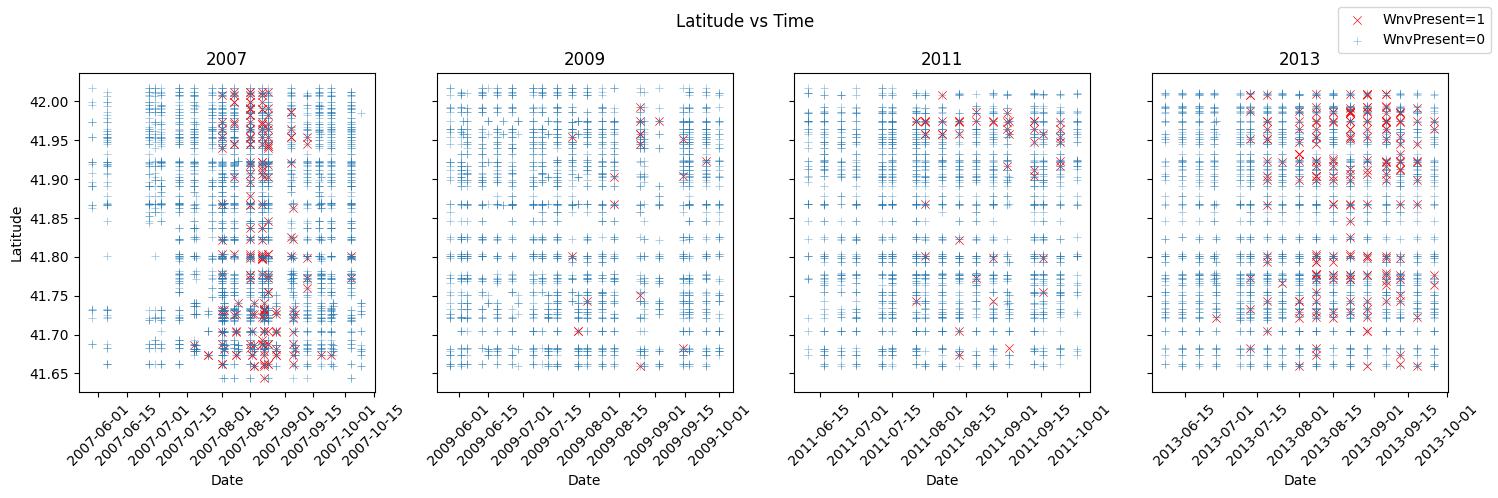

<Figure size 640x480 with 0 Axes>

In [116]:
# Latitude vs Time
scatter('Latitude', alpha=0.5)
plt.savefig('../images/Latitude_scatter.png', bbox_inches='tight')

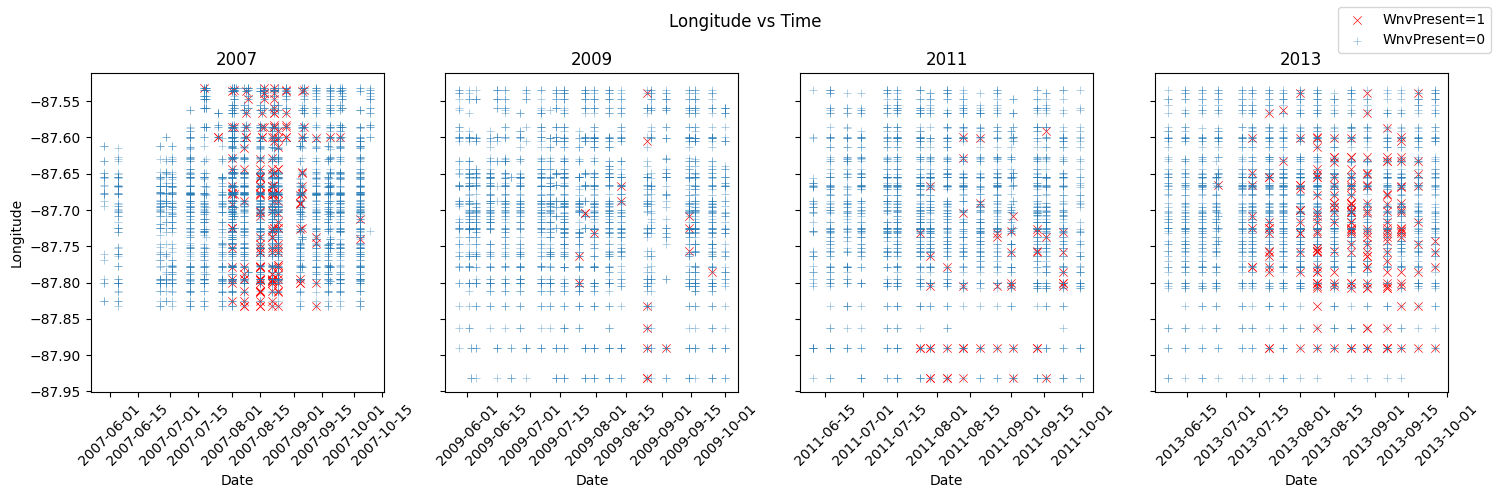

<Figure size 640x480 with 0 Axes>

In [117]:
# Longitude vs Time
scatter('Longitude', alpha=0.5)
plt.savefig('../images/Longitude_scatter.png', bbox_inches='tight')

There is a general trend in each year showing that the entries where the virus is present is more concentrated than the entries where the virus is absent. The seem to be much more concentrated in August and September in 2007 and 2013. Regarding location, there does not seem to be a clear pattern where the virus tends to show up.

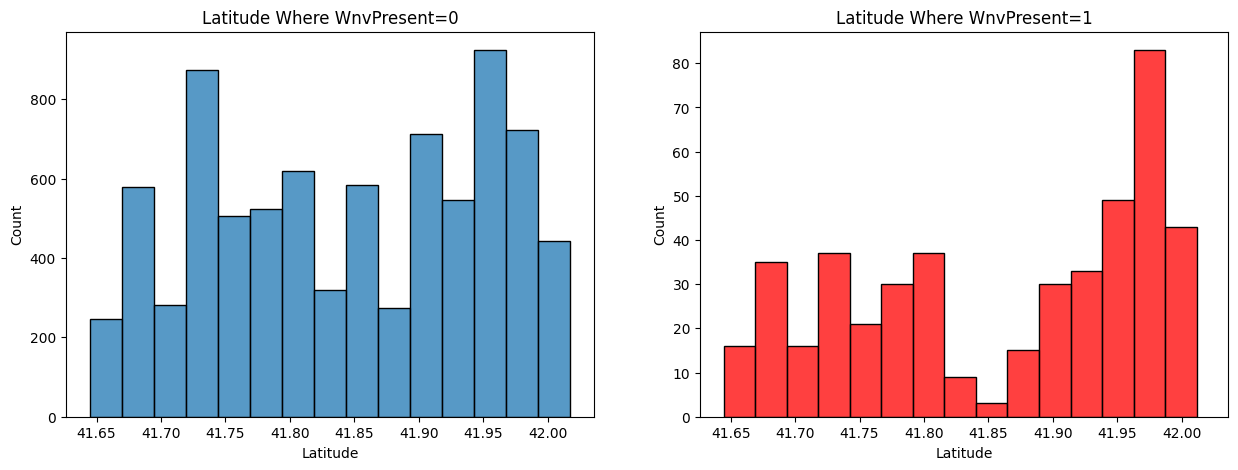

In [120]:
# Latitude Histograph
dual_histplot('Latitude', bins=15)

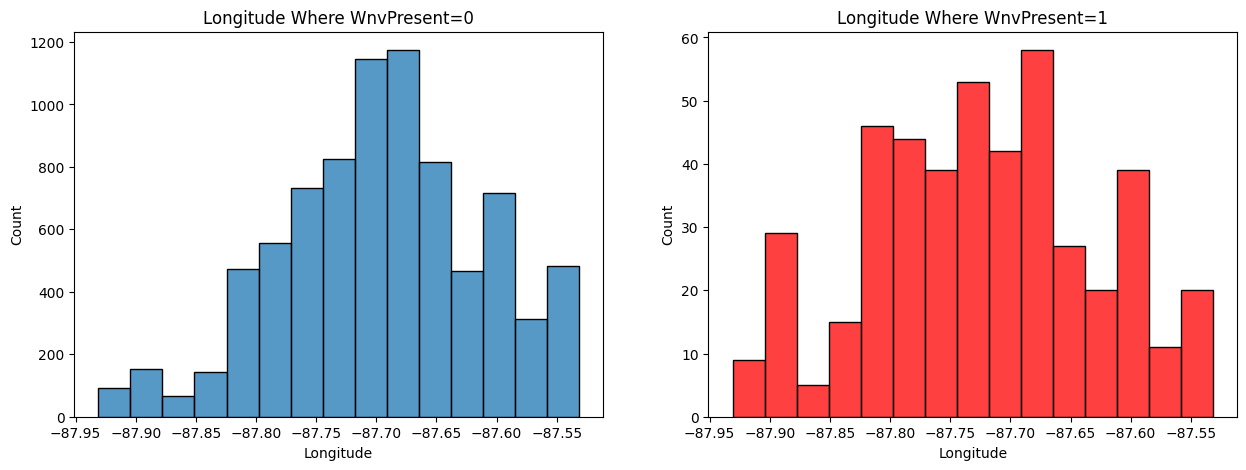

In [119]:
# Longitude Histograph
dual_histplot('Longitude', bins=15)

We can see there is a large spike of cases of the virus showing up at around 41.96 latitude. There is also a slight increase of cases at around -87.80 longitude.

#### WnvPresent and Month

In [15]:
# value counts per month for wnv present
wnv1['Month'].value_counts(normalize=True)

8     0.663020
9     0.240700
7     0.089716
10    0.004376
6     0.002188
Name: Month, dtype: float64

In [16]:
# value counts per month for wnv absent
wnv0['Month'].value_counts(normalize=True)

8     0.310561
7     0.254998
9     0.228505
6     0.163866
10    0.032135
5     0.009935
Name: Month, dtype: float64

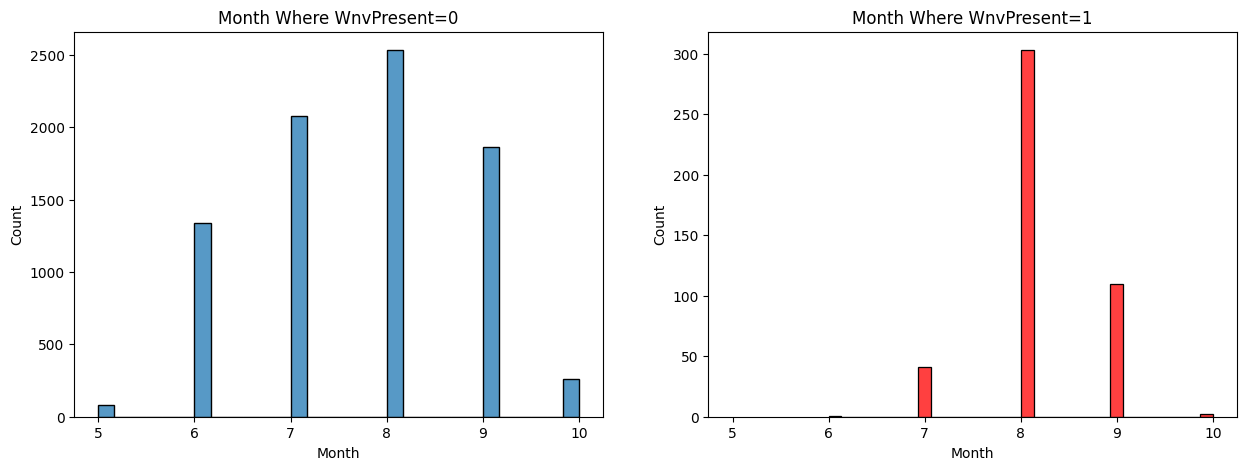

In [17]:
dual_histplot('Month')

We can see that about 90% of the cases where the virus was present were in August and September while the same pattern is not present in the cases where the virus was absent.

#### WnvPresent and Temperature

We know that temperature usually follows an annual pattern. We can explore to see if there is any connection between temperature and time as well as temperature and the presence of the virus.

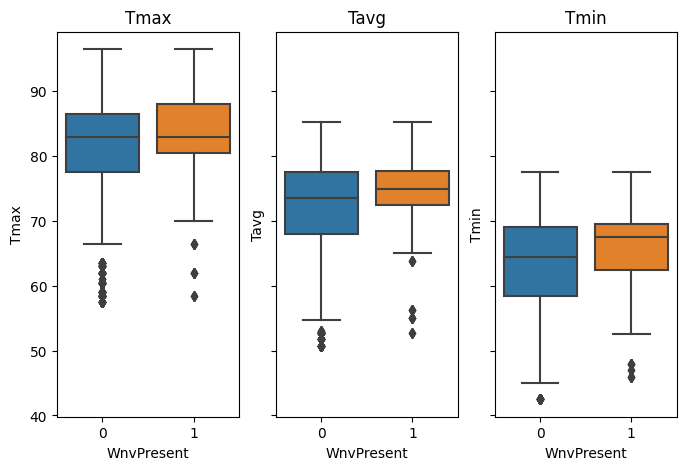

In [18]:
# Temperature boxplots
fig, ax = plt.subplots(1,3, figsize=(8,5), sharey=True)
# Tavg
sns.boxplot(ax=ax[0], data=wnv, x='WnvPresent', y='Tmax')
ax[0].set_title('Tmax')

# Tmax
sns.boxplot(ax=ax[1], data=wnv, x='WnvPresent', y='Tavg')
ax[1].set_title('Tavg')

# Tmin
sns.boxplot(ax=ax[2], data=wnv, x='WnvPresent', y='Tmin')
ax[2].set_title('Tmin')

plt.savefig('../images/Temp_spread.png', bbox_inches='tight')
plt.show()

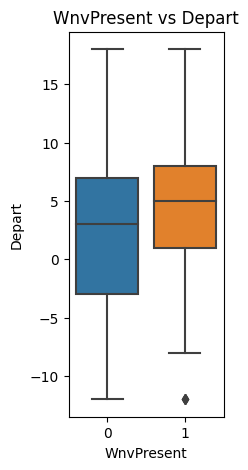

In [19]:
fig, ax = plt.subplots(figsize=(2,5))

# Depart
sns.boxplot(data=wnv, x='WnvPresent', y='Depart')
ax.set_title('WnvPresent vs Depart')

plt.show()

We can see that the temperature readings for the times the virus was present is generally higher than the times the virus was absent.

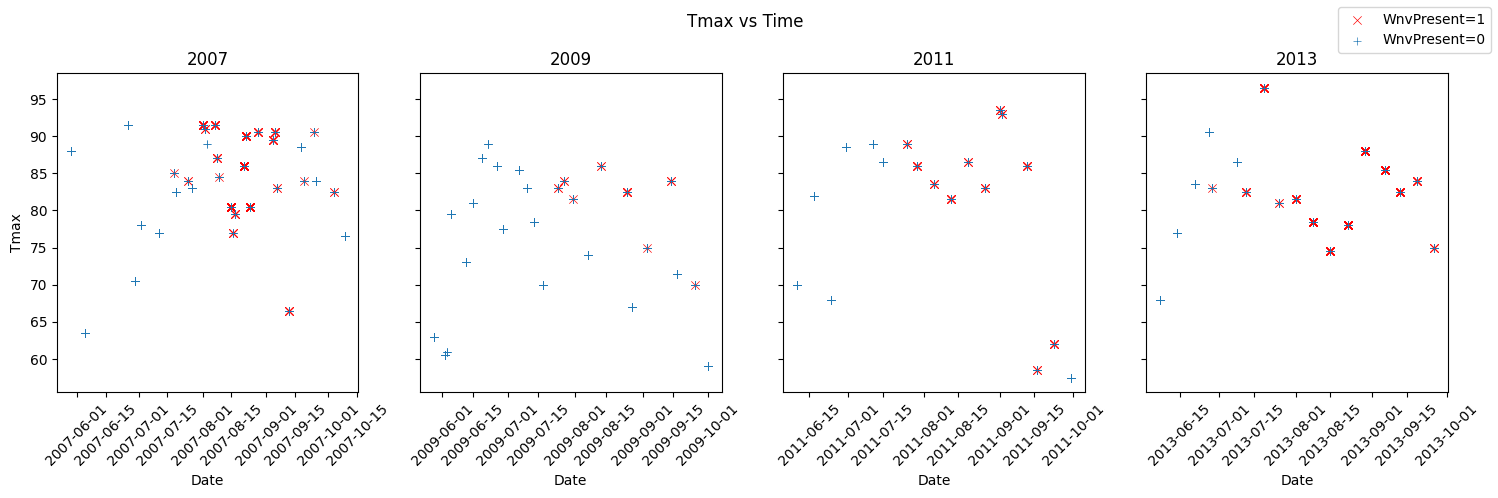

In [20]:
# Tmax scatterplot
scatter('Tmax')

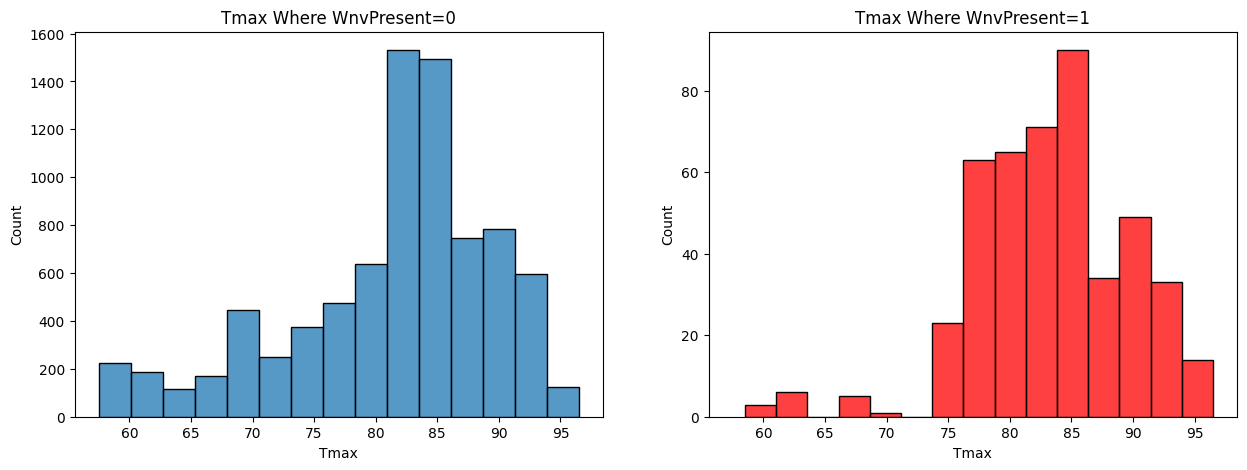

In [21]:
# Tmax histogram
dual_histplot('Tmax', bins=15)

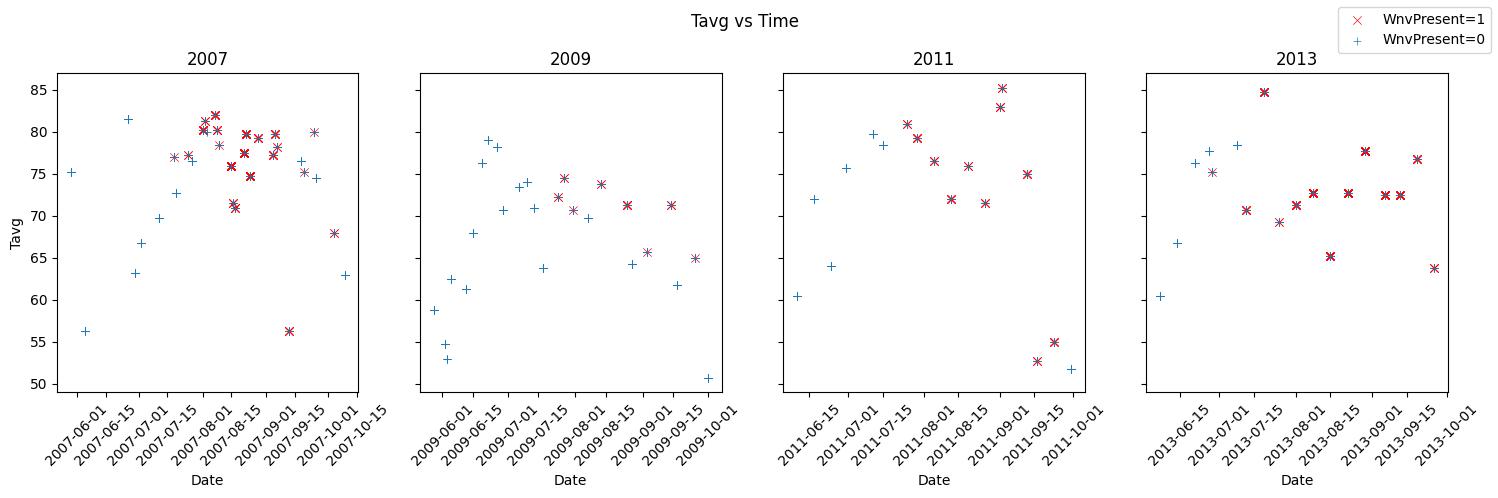

In [22]:
# Tavg scatterplot
scatter('Tavg')

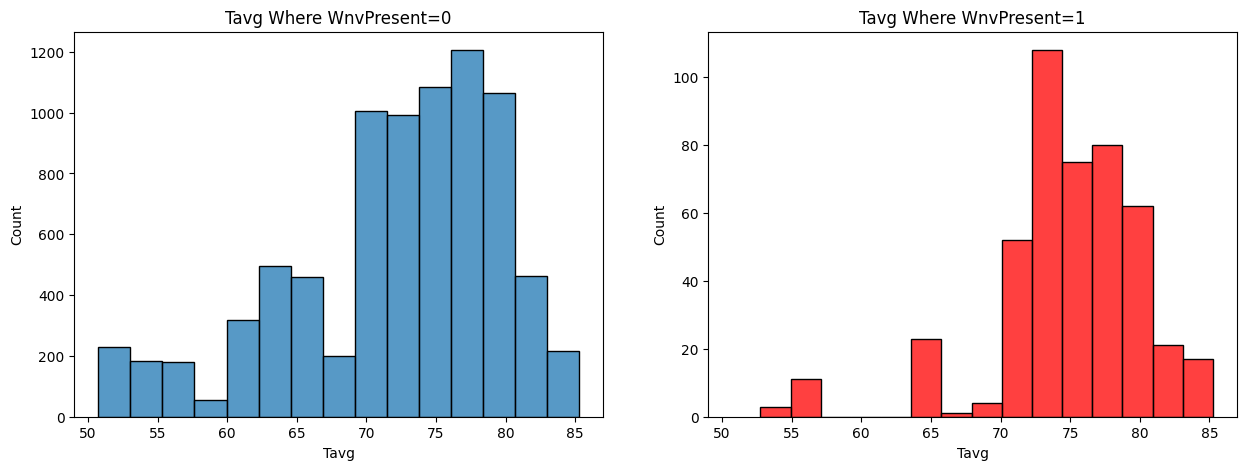

In [23]:
# Tavg histogram
dual_histplot('Tavg', bins=15)

There is a peak of cases of the virus at around an average temperature of 73 degrees Fahrenheit.

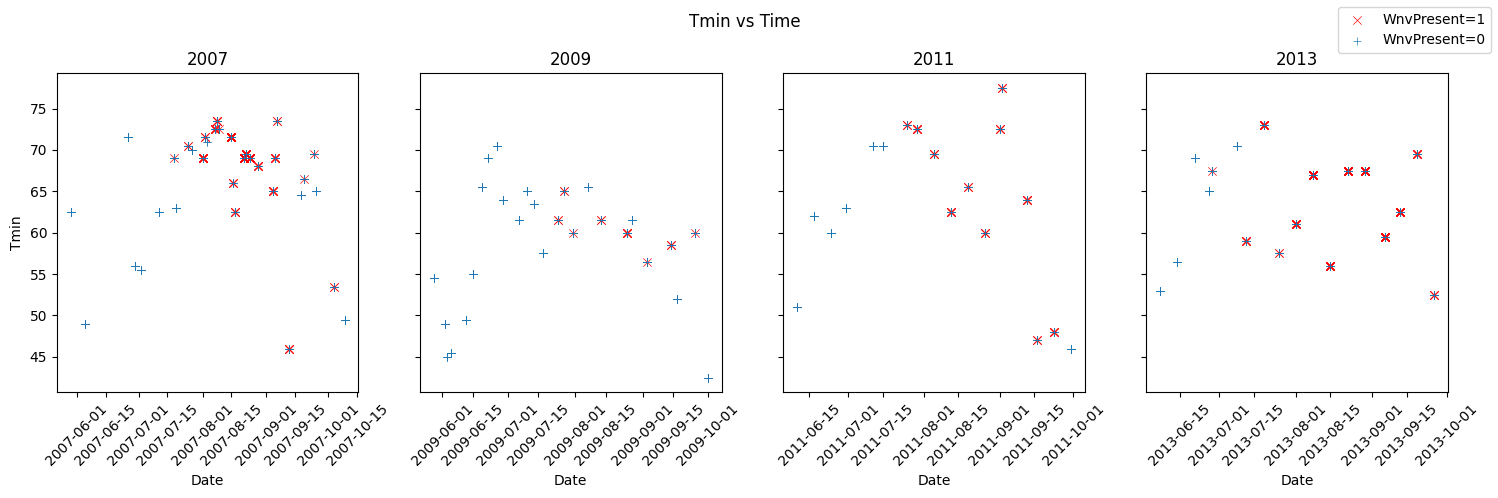

In [24]:
# Tavg scatter plot
scatter('Tmin')

The virus seems to be more present in mid to high temperatures for the most part. This is most apparent in 2007.

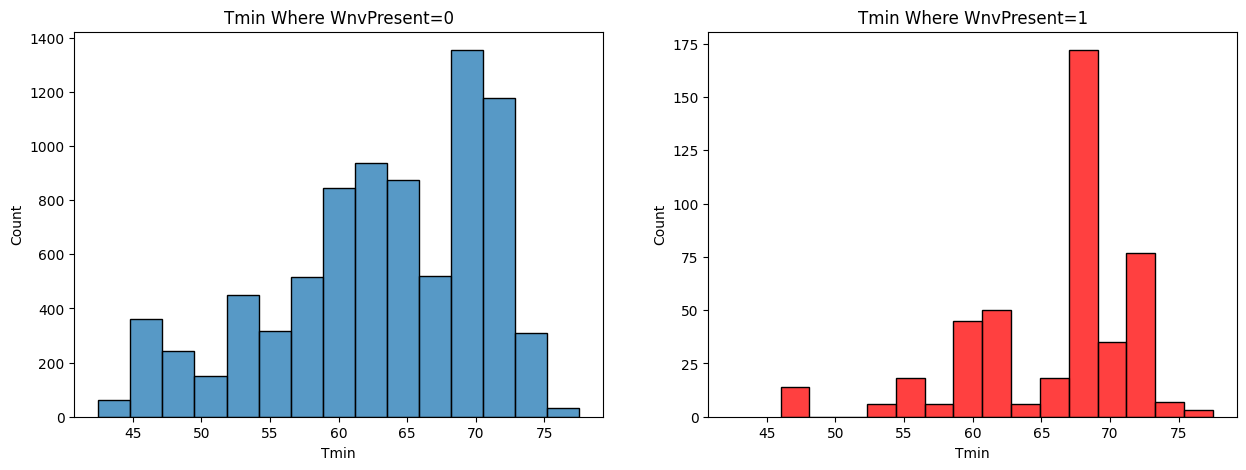

In [25]:
# Tmin histogram
dual_histplot('Tmin', bins=15)

There is a slight increase of cases of the virus at around an average temperature of 67 and 68 degrees Fahrenheit.

#### Species

In [26]:
wnv['Species'].value_counts()

CULEX PIPIENS/RESTUANS    3899
CULEX RESTUANS            2409
CULEX PIPIENS             1996
CULEX TERRITANS            216
CULEX SALINARIUS            83
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

In [27]:
species_count = wnv['Species'].value_counts()
species_wnv = wnv.groupby('Species')['WnvPresent'].sum().sort_values(ascending=False)
species_count = species_count.to_frame().join(species_wnv.to_frame())
species_count = species_count.rename(columns={'Species': 'Sample', 'WnvPresent': 'Wnv_sample'})\
                            .reset_index()\
                            .rename(columns={'index':'Species'})
species_count['Wnv_percent'] = species_count['Wnv_sample']*100/species_count['Sample']
species_count.sort_values(by='Sample', ascending=False)

Species  Sample  Wnv_sample  Wnv_percent
0  CULEX PIPIENS/RESTUANS    3899         225     5.770710
1          CULEX RESTUANS    2409          48     1.992528
2           CULEX PIPIENS    1996         184     9.218437
3         CULEX TERRITANS     216           0     0.000000
4        CULEX SALINARIUS      83           0     0.000000
5          CULEX TARSALIS       6           0     0.000000
6         CULEX ERRATICUS       1           0     0.000000

In [28]:
species_count.sort_values(by='Wnv_percent',ascending=False)

Species  Sample  Wnv_sample  Wnv_percent
2           CULEX PIPIENS    1996         184     9.218437
0  CULEX PIPIENS/RESTUANS    3899         225     5.770710
1          CULEX RESTUANS    2409          48     1.992528
3         CULEX TERRITANS     216           0     0.000000
4        CULEX SALINARIUS      83           0     0.000000
5          CULEX TARSALIS       6           0     0.000000
6         CULEX ERRATICUS       1           0     0.000000

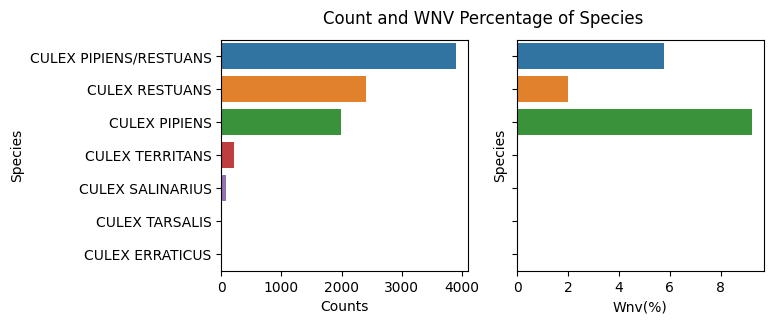

In [29]:
# species bar plots
fig, ax = plt.subplots(1, 2, figsize=(7, 3), sharey=True)
fig.suptitle('Count and WNV Percentage of Species')
g1 = sns.barplot(x="Sample", 
                 y="Species", 
                 data=species_count, 
                 ax=ax[0],
                 orient='h')
#g1.set_xticklabels(g1.get_xticklabels(), rotation=90,size=10)
g1.set(xlabel='Counts')

g2 = sns.barplot(x="Wnv_percent", 
                 y='Species',
                 data=species_count, 
                 ax=ax[1],
                 orient='h')
#g2.set_xticklabels (g2.get_xticklabels(), rotation=90, size=10)
g2.set(xlabel='Wnv(%)')
#plt.subplots_adjust(wspace=0.4)

plt.savefig('../images/WNV_species_count_percentage.png', bbox_inches='tight')
plt.show()

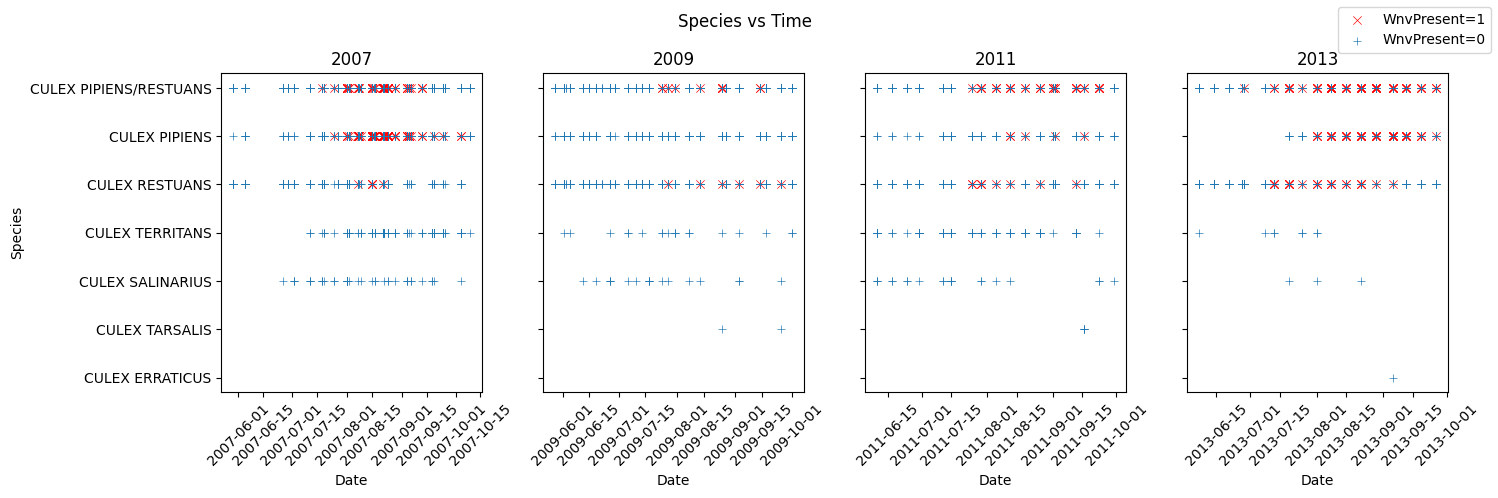

In [30]:
scatter('Species')

We can see the virus is only present with the `culex pipiens`, `culex restauns` and combined `culexpipiens/restauns` species. 

#### Trap and Block Columns

To evaluate the impact of these columns with the presence of the virus we will calculate the ratio between the times the virus was detected and when the virus was absent for each of the traps and blocks in these columns.

In [31]:
trap_count = wnv['Trap'].value_counts()
trap_wnv = wnv.groupby('Trap')['WnvPresent'].sum().sort_values(ascending=False)
trap_count = trap_count.to_frame().join(trap_wnv.to_frame())
trap_count = trap_count.rename(columns={'Trap': 'Sample', 'WnvPresent': 'Wnv_sample'})
trap_count['Wnv_percent']=trap_count['Wnv_sample']*100/trap_count['Sample']
trap_count.sort_values(by='Sample',ascending=False).head()

Sample  Wnv_sample  Wnv_percent
T900     182          29    15.934066
T115     158          15     9.493671
T135     153           8     5.228758
T002     150          15    10.000000
T151     144           6     4.166667

In [32]:
trap_count.sort_values(by='Wnv_percent',ascending=False).head()

Sample  Wnv_sample  Wnv_percent
T143      28           5    17.857143
T006      24           4    16.666667
T900     182          29    15.934066
T086      48           7    14.583333
T005      14           2    14.285714

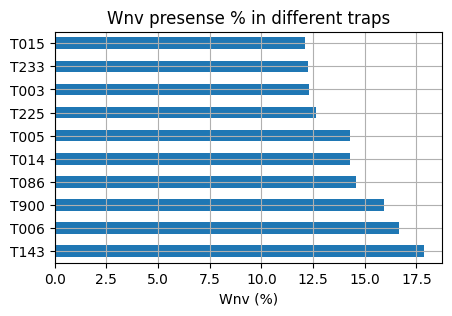

In [33]:
trap_count['Wnv_percent'].sort_values(ascending=False).head(10).plot(kind='barh', 
                                                                     figsize=(5, 3), 
                                                                     title='Wnv presense % in different traps')
plt.xlabel('Wnv (%)')
plt.grid()
plt.savefig('../images/WNV_trap_percentage.png', bbox_inches='tight')
plt.show()

In [34]:
def wnv_percent_df(column):
    '''This function creates a dataframe with the 'column' in first column and the ratio between WnvPresent=1
    and WnvPresent=0. In other words, it shows the percentage of times the virus is present in the given value
    of 'column'
    '''
    lst = list(wnv[column].unique())
    dic = {}
    for i in lst:
        vc = list(wnv[wnv[column] == i]['WnvPresent'].value_counts(normalize=True))
        dic[i] = 1 - vc[0]
    df = pd.DataFrame.from_dict(dic, orient='index').reset_index()
    df.rename(columns={'index': column, 0:'WnvPresent_%'}, inplace=True)
    return df

def wnv_percent_bargraph_x(column, figsize=(5,5)):
    """This function creates a standard bar graph that measures the the ratio between WnvPresent=1
    and WnvPresent=0.
    """
    lst = list(wnv[column].unique())
    dic = {}
    for i in lst:
        vc = list(wnv[wnv[column] == i]['WnvPresent'].value_counts(normalize=True))
        dic[i] = 1 - vc[0]
    blockpercent = pd.DataFrame.from_dict(dic, orient='index').reset_index()
    blockpercent.rename(columns={'index': column, 0:'WnvPresent_%'}, inplace=True)

    fig, ax = plt.subplots(figsize=figsize)
    
    sns.barplot(data=blockpercent, x=column, y='WnvPresent_%')
    plt.title('Percentage of Cases Where WnvPresent=1 for {} Column'.format(column))
    plt.tick_params(axis='x', labelrotation=45)
    plt.axhline(.05, ls='--')
    plt.axhline(.10, ls='--')
    plt.axhline(.15, ls='--')
    plt.show()
    
def wnv_percent_bargraph_y(column, figsize=(5,5)):
    """This function creates a horizontal bar graph that measures the the ratio between WnvPresent=1
    and WnvPresent=0.
    """
    lst = list(wnv[column].unique())
    dic = {}
    for i in lst:
        vc = list(wnv[wnv[column] == i]['WnvPresent'].value_counts(normalize=True))
        dic[i] = 1 - vc[0]
    blockpercent = pd.DataFrame.from_dict(dic, orient='index').reset_index()
    blockpercent.rename(columns={'index': column, 0:'WnvPresent_%'}, inplace=True)

    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(data=blockpercent, y=column, x='WnvPresent_%')
    plt.title('Percentage of Cases Where WnvPresent=1 for {} Column'.format(column))
    plt.tick_params(axis='x', labelrotation=45)
    plt.axvline(.05, ls='--')
    plt.axvline(.10, ls='--')
    plt.axvline(.15, ls='--')
    plt.show()

In [35]:
#wnv_percent_bargraph_y('Trap', figsize=(5,19))

In [36]:
#wnv_percent_bargraph_x('Block', figsize=(15,5))

We can see that the majority of the entries for each trap indicates that the virus was present less than 15% of the time for most blocks. The exception being traps T006, T143 and T900.

We can see that the majority of the entries for each block indicates that the virus was present less than 10% of the time for most blocks. The exception being block 46 and block 82 with the virus being present close to 12% for both.

Let's examine if these particular traps and blocks  can be considered significant.

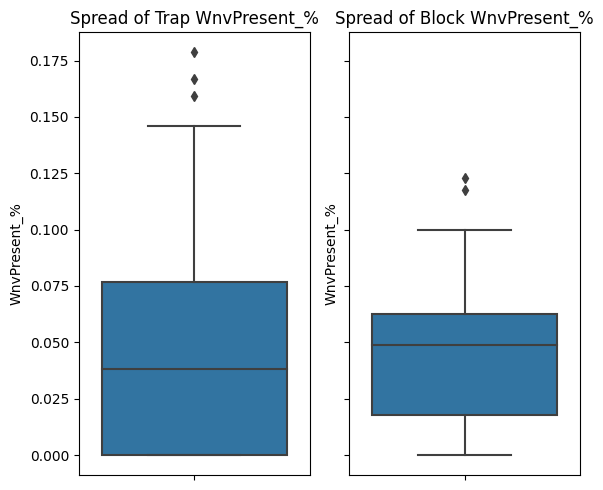

In [37]:
fig, ax = plt.subplots(1,2, figsize=(6,5), sharey=True)

# Trap spread of values where the WnvPresent=1 percentage
sns.boxplot(ax=ax[0], data=wnv_percent_df('Trap'), y='WnvPresent_%', whis=1)
ax[0].set_title('Spread of Trap WnvPresent_%')

# Block spread of values where the WnvPresent=1 percentage
sns.boxplot(ax=ax[1], data=wnv_percent_df('Block'), y='WnvPresent_%', whis=1)
ax[1].set_title('Spread of Block WnvPresent_%')

fig.tight_layout()

plt.savefig('../images/WNV_trap_spread.png', bbox_inches='tight')
plt.show()

It appears that the traps and blocks we had pointed out (traps T006, T143, T900 and blocks 46 and 42) are beyond 1x the interquartile range. 

In [38]:
# This is to find the traps that are in the blocks that are of significance
block46 = list(wnv[wnv['Block'] == 46]['Trap'].unique())
block82 = list(wnv[wnv['Block'] == 82]['Trap'].unique())
print('Traps in Block 46: {}'.format(block46))
print('Traps in Block 82: {}'.format(block82))

Traps in Block 46: ['T003']
Traps in Block 82: ['T097', 'T225']


#### DewPoint and WetBulb

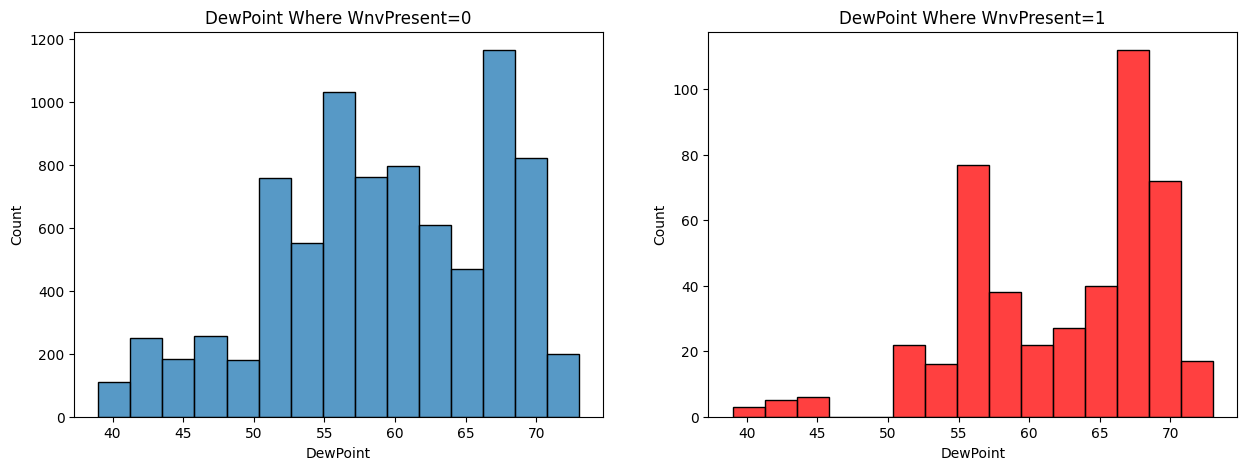

In [39]:
dual_histplot('DewPoint', bins=15)

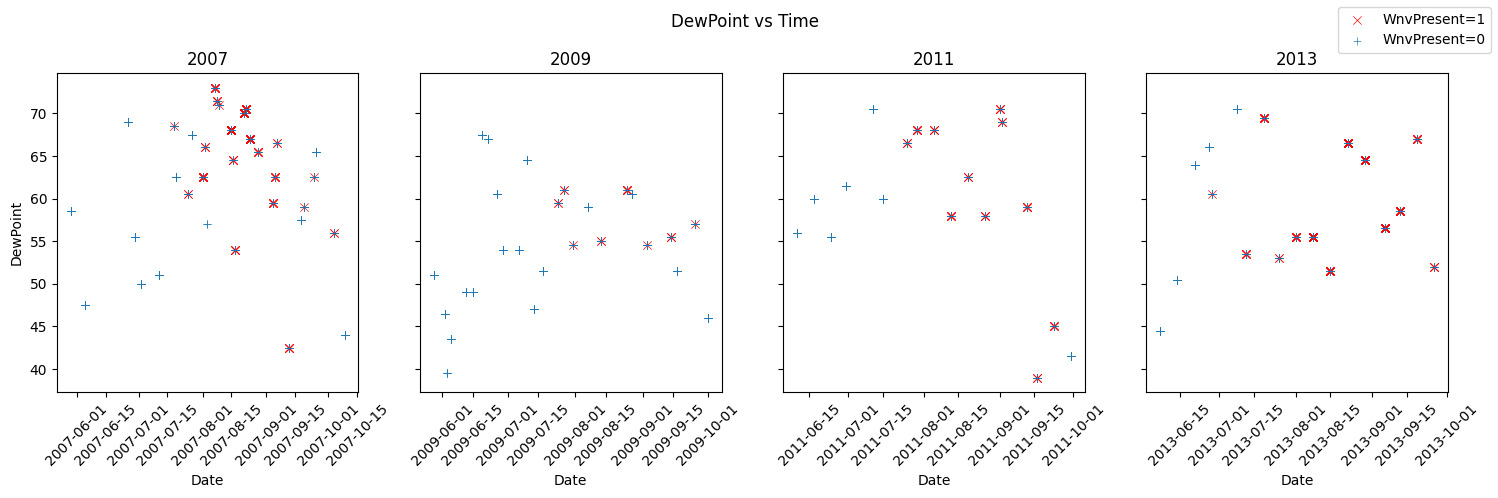

In [40]:
scatter('DewPoint')

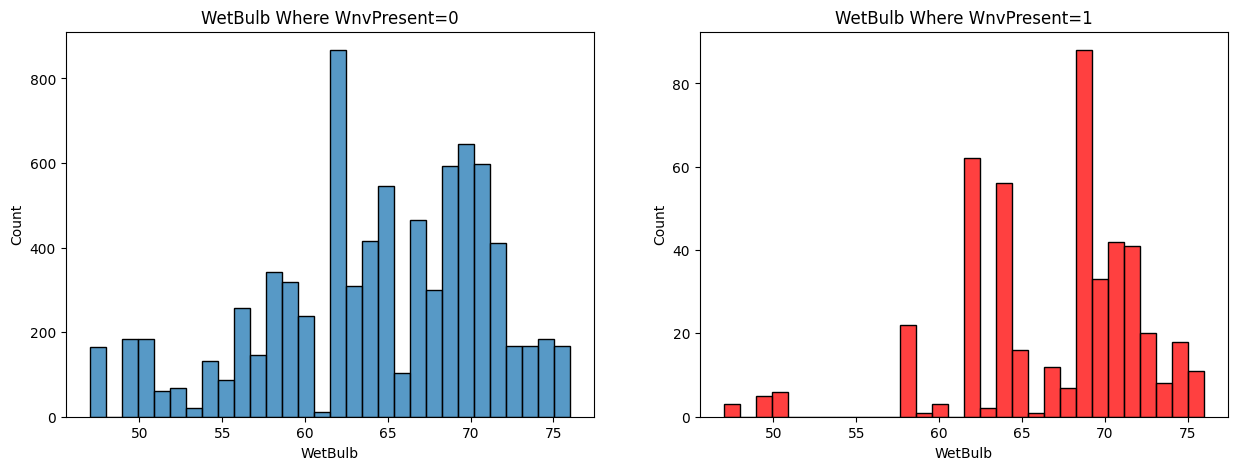

In [41]:
# WetBulb
dual_histplot('WetBulb')

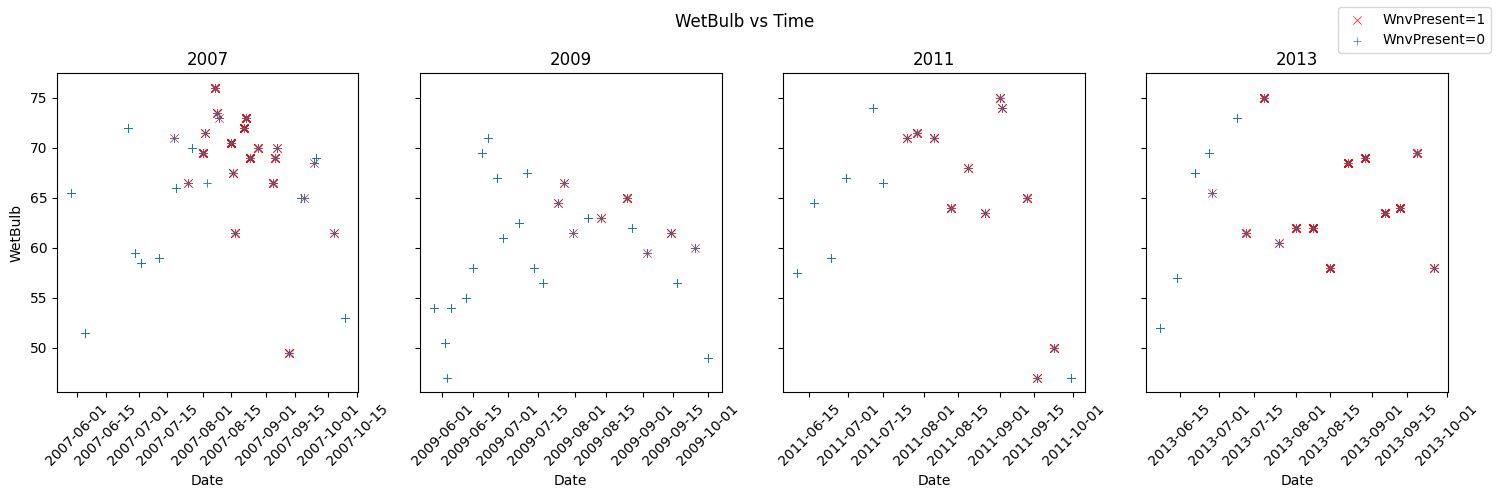

In [42]:
scatter('WetBulb')

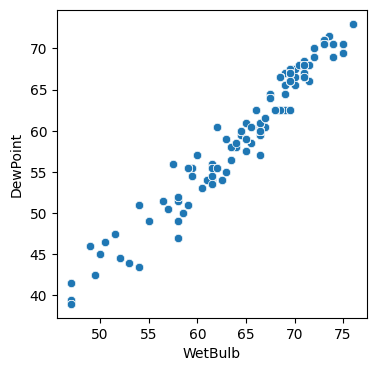

In [43]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(x='WetBulb',y='DewPoint', data=wnv)
plt.subplots_adjust(wspace=0.5)
plt.show()

There is a peak of cases of the virus where the dew point is 55, 67 and 70. There is also a significant peak of cases where the wet bulb is ~68.

#### Heat and Cool

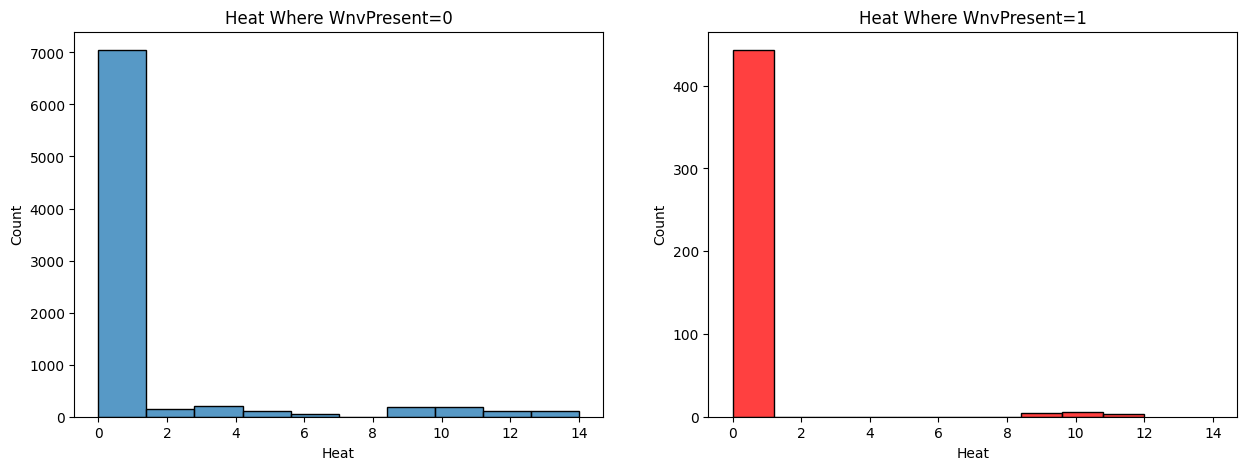

In [44]:
# Heat
dual_histplot('Heat', bins=10)

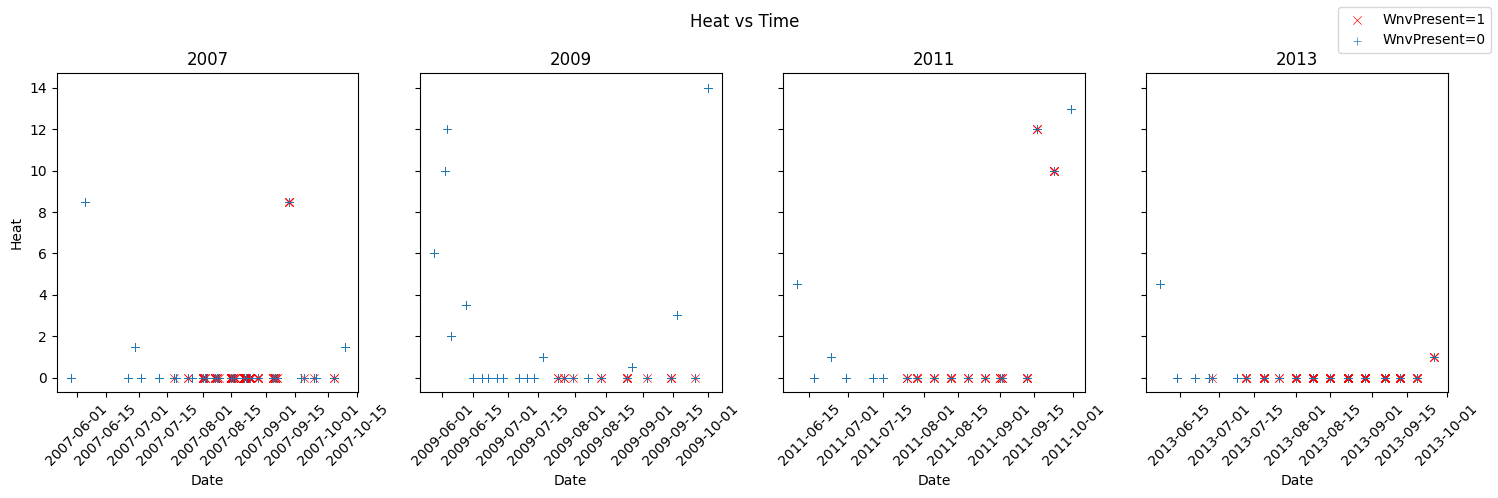

In [45]:
scatter('Heat')

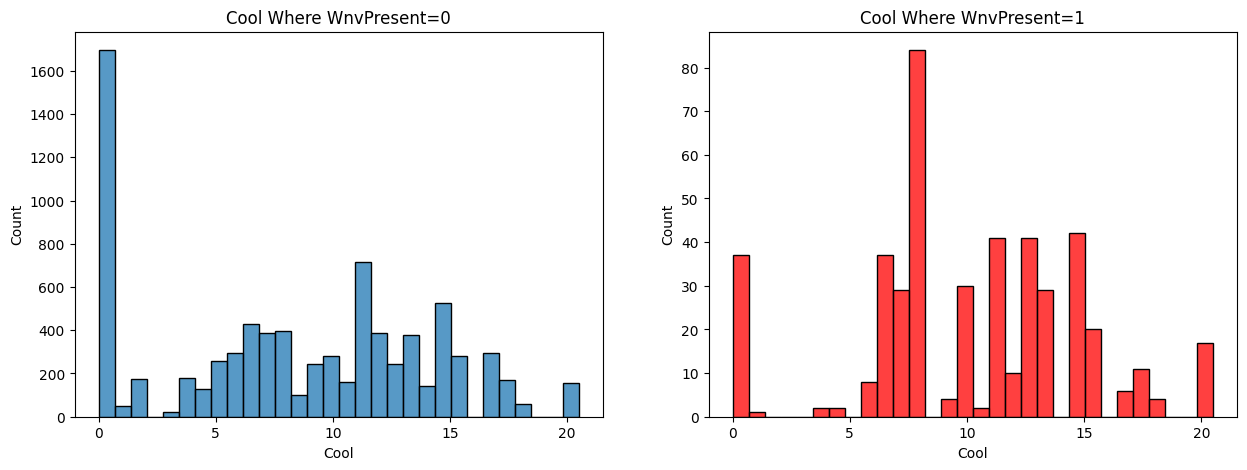

In [46]:
# Cool
dual_histplot('Cool')

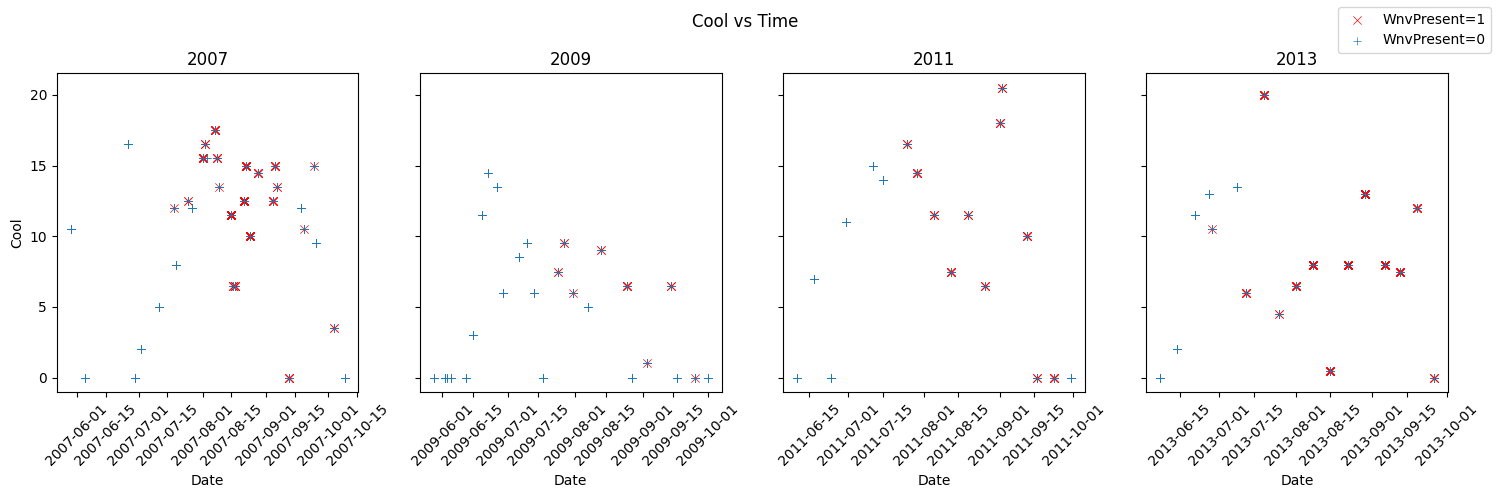

In [47]:
scatter('Cool')

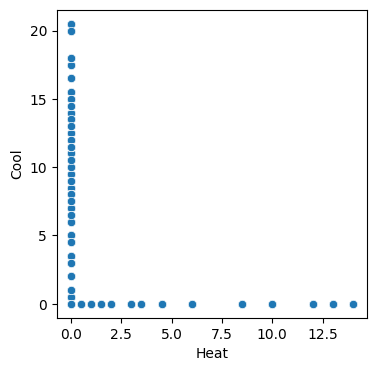

In [48]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(x='Heat',y='Cool', data=wnv)
plt.subplots_adjust(wspace=0.5)
plt.show()

There doesn't seem to be any apparent significance with the `Heat` column but there is an increase of positive cases where `Cool` is around 8.

#### Sunrise and Sunset

In [49]:
# Sunrise
#dual_histplot('Sunrise', bins=15)

In [50]:
#scatter('Sunrise')

In [51]:
# Sunset
#dual_histplot('Sunset', bins=15)

In [52]:
#scatter('Sunset')

There are notable differences in both `Sunrise` and `Sunset`. There is an increase of cases of the virus when the sunset is between 440 and 460 as well as between 500 and 530. There also is a peak of cases when the sunset is between 1840 an 1860. This seems to be in line with the months of August and September we saw earlier.

#### PrecipTotal

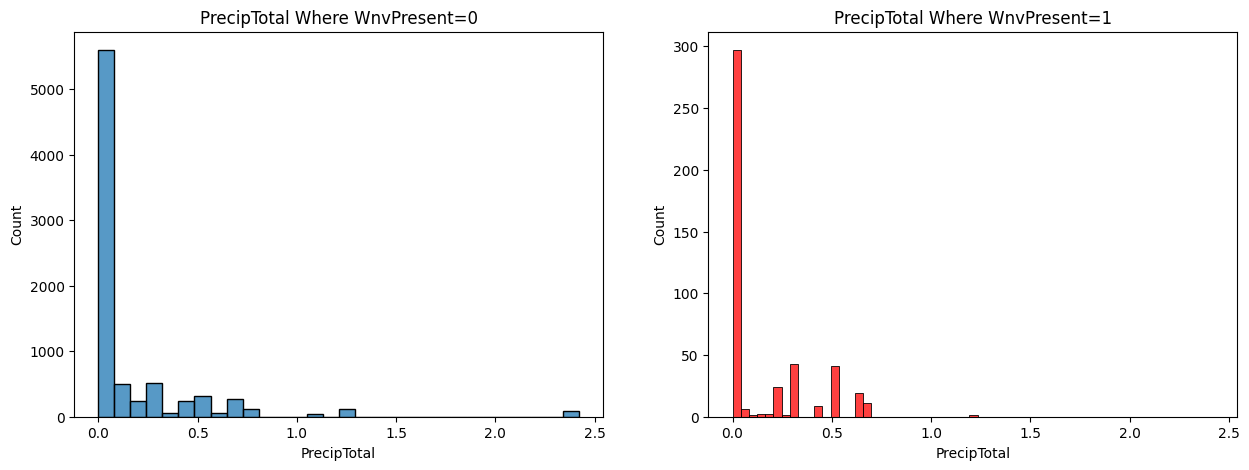

In [53]:
#  PrecipTotal
dual_histplot('PrecipTotal')

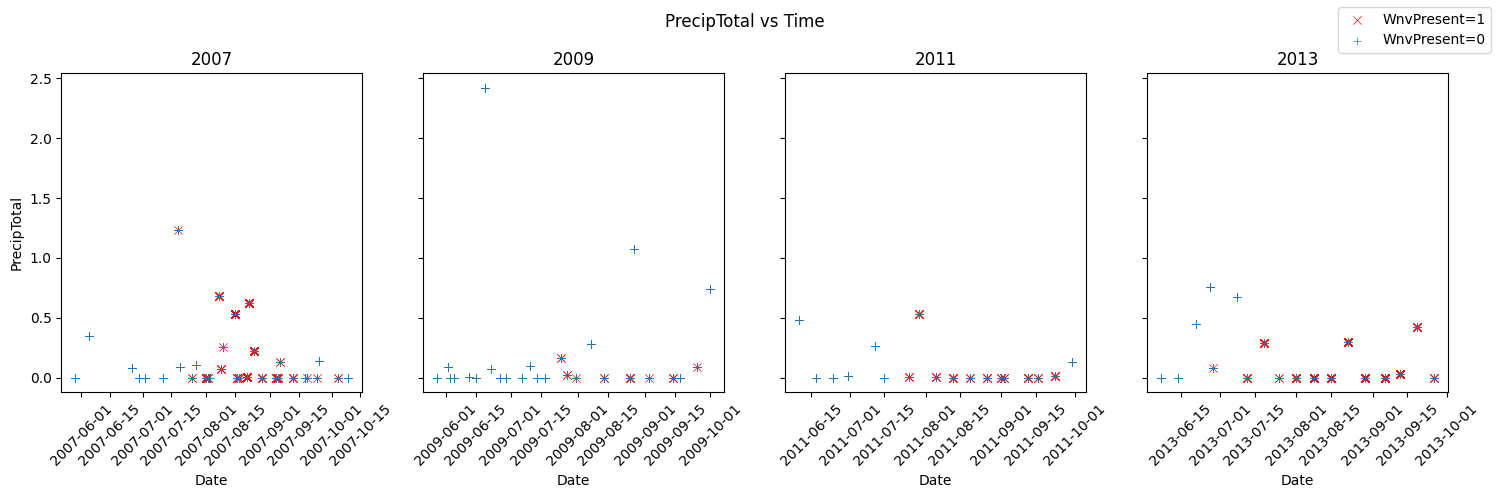

In [54]:
scatter('PrecipTotal')

These two columns don't show anything of significance for the presence of the virus.

#### StnPressure and SeaLevel

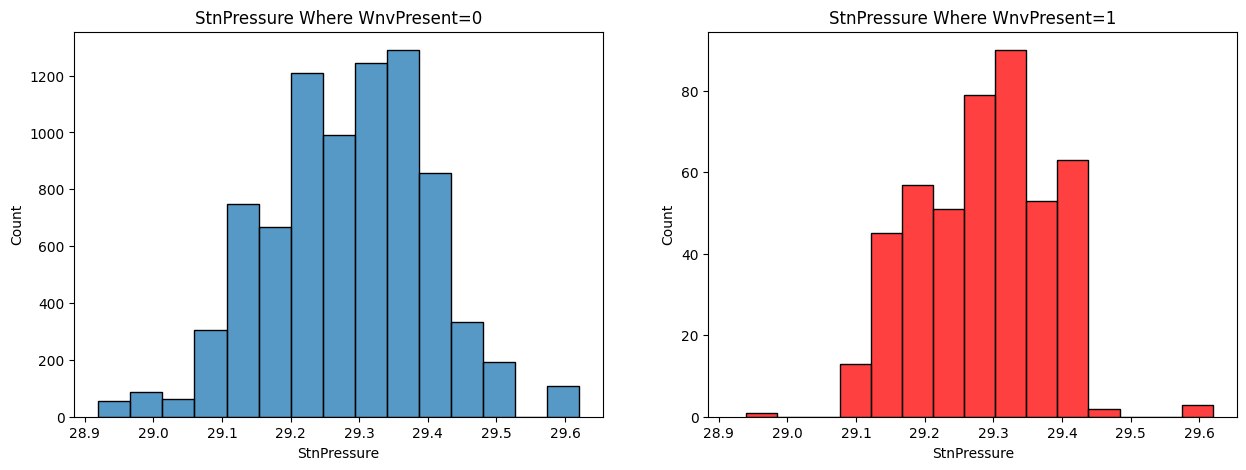

In [55]:
# StnPressure
dual_histplot('StnPressure', bins=15)

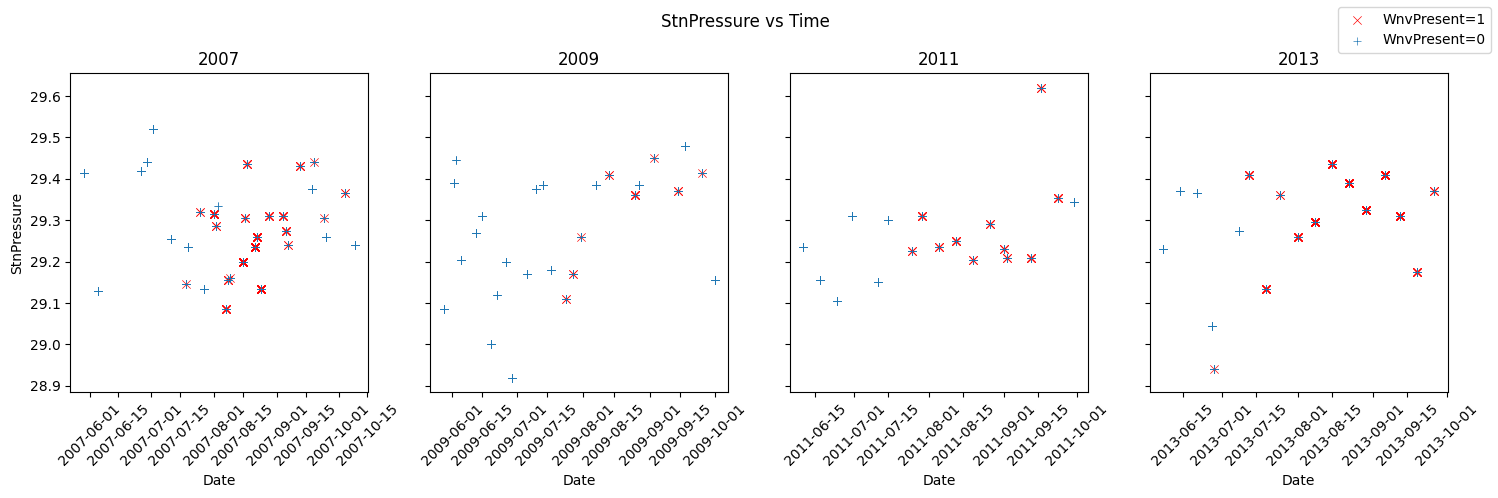

In [56]:
scatter('StnPressure')

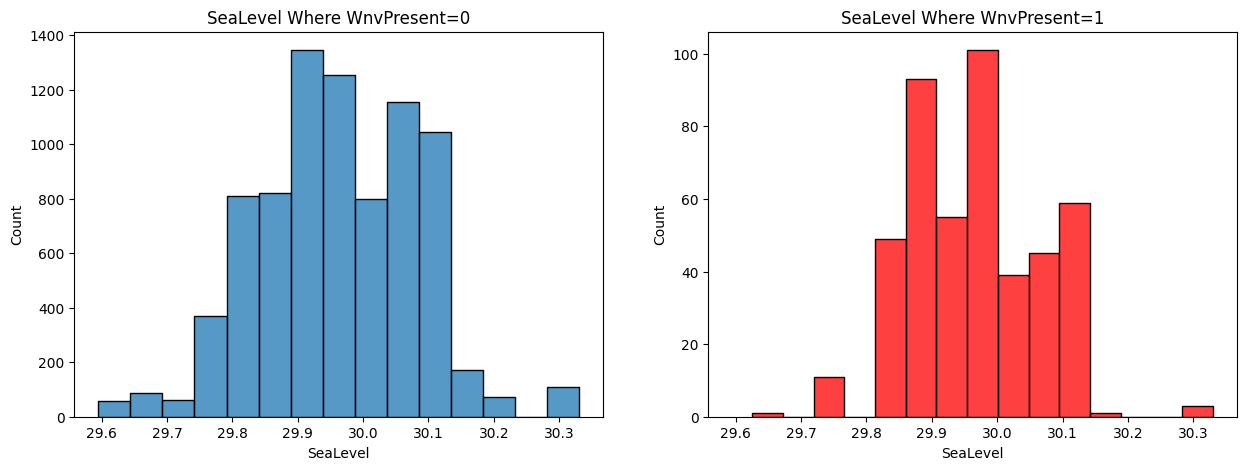

In [57]:
# SeaLevel
dual_histplot('SeaLevel', bins=15)

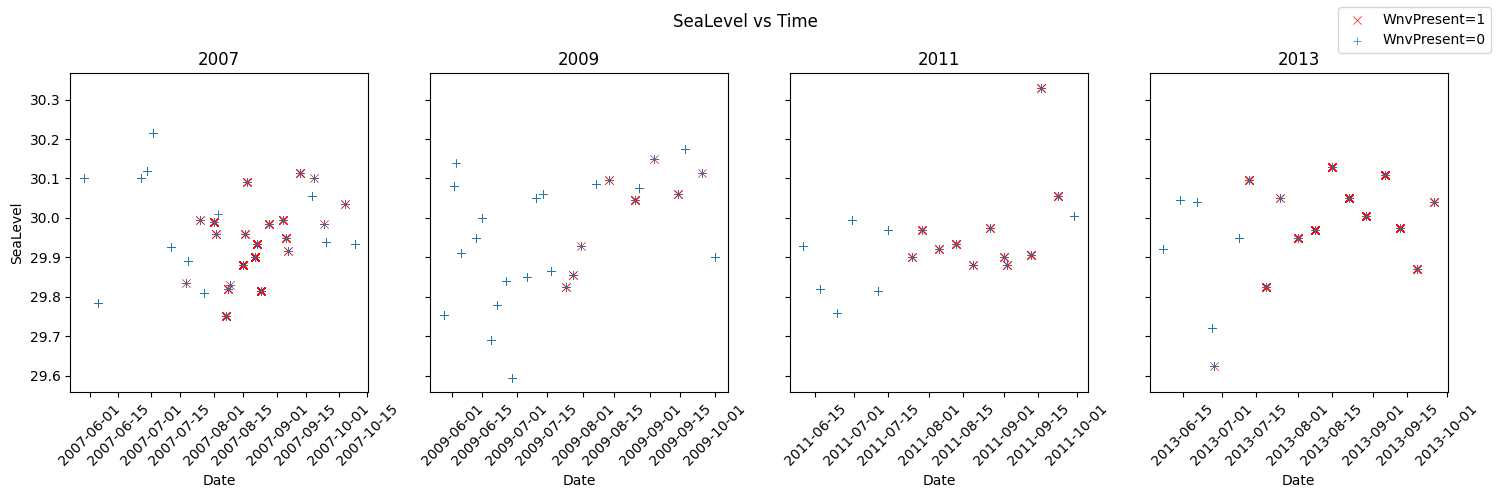

In [58]:
scatter('SeaLevel')

There doesn't appear to be anything drastic in these to column but some very slight peaks.

#### ResultSpeed, ResultDir, and AvgSpeed

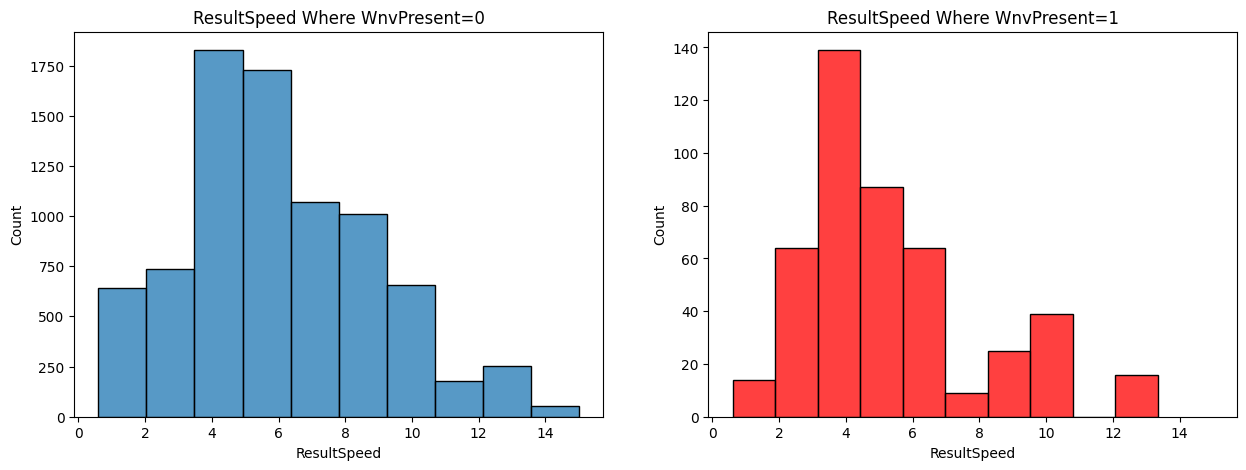

In [59]:
# ResultSpeed
dual_histplot('ResultSpeed', bins=10)

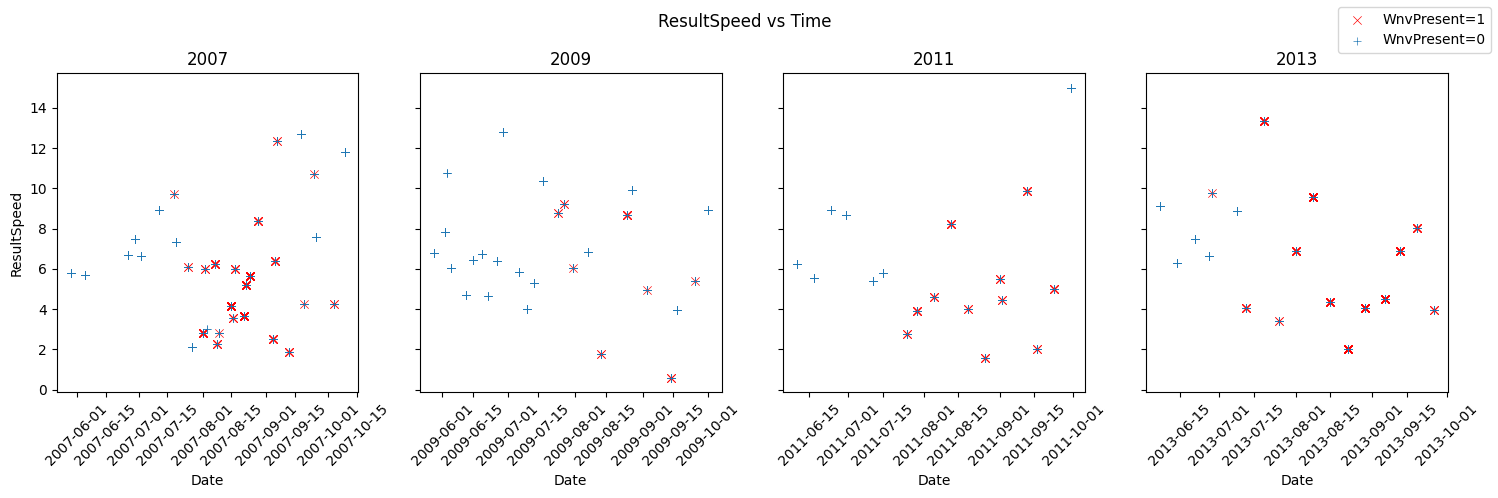

In [60]:
scatter('ResultSpeed')

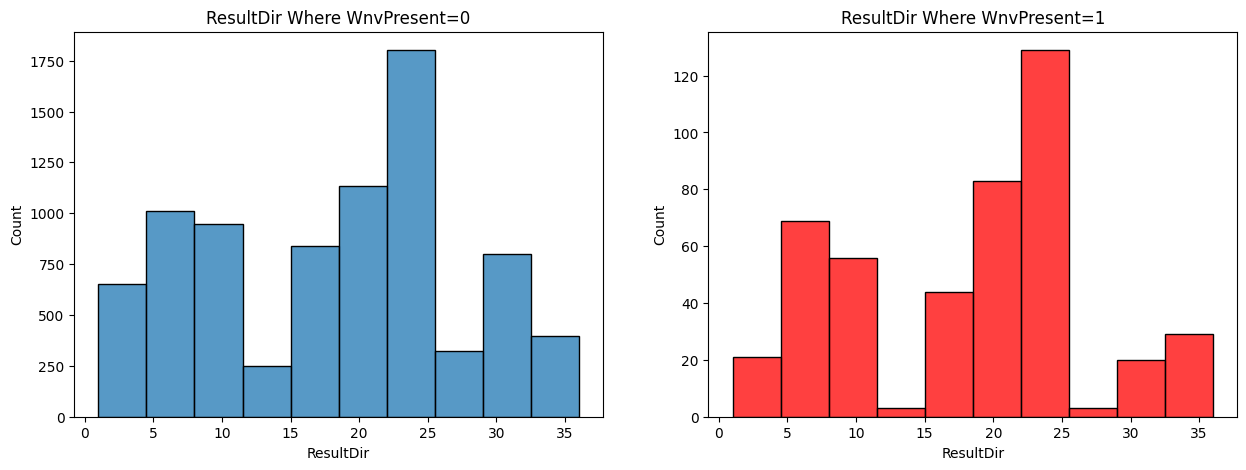

In [61]:
# ResultDir
dual_histplot('ResultDir', bins=10)

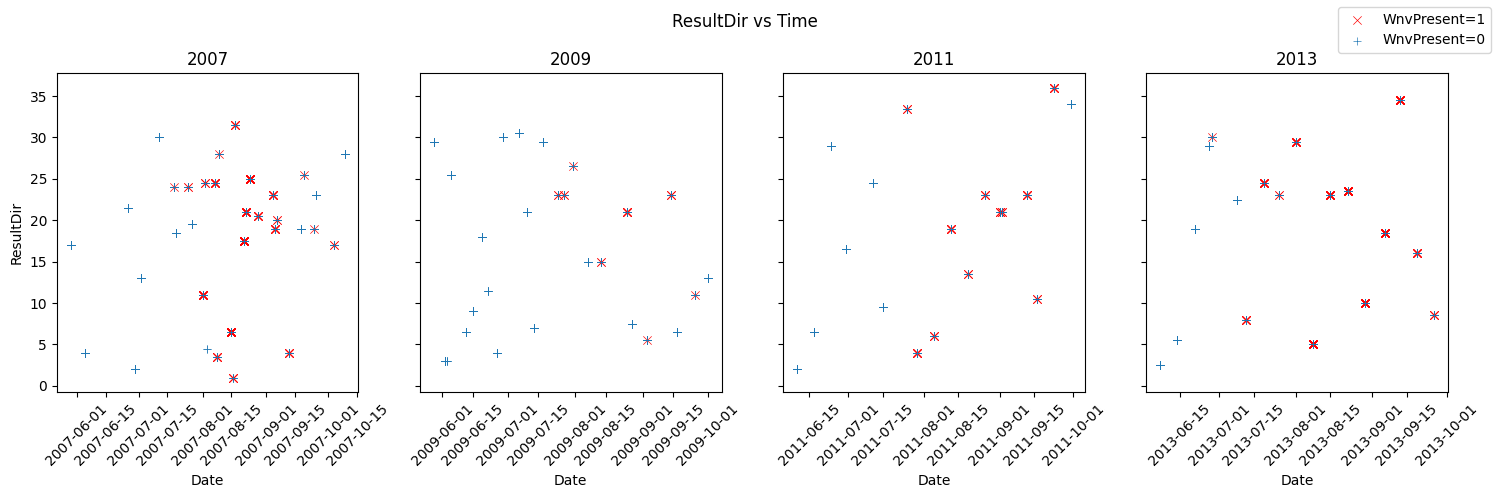

In [62]:
scatter('ResultDir')

Nothing drastic here as well. There is only a slight higher concentration of cases at `ResultSpeed`= ~4

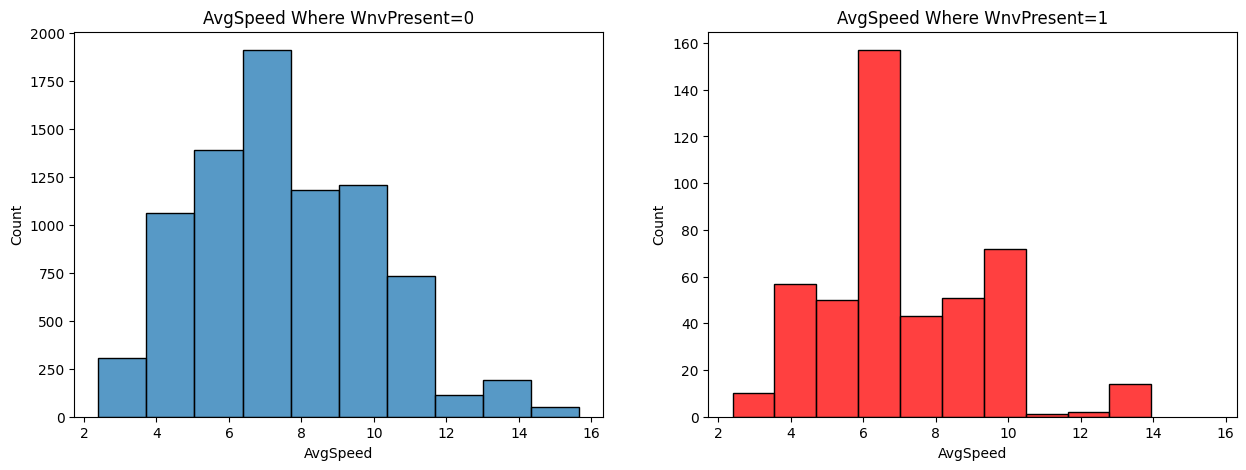

In [63]:
# AvgSpeed
dual_histplot('AvgSpeed', bins=10)

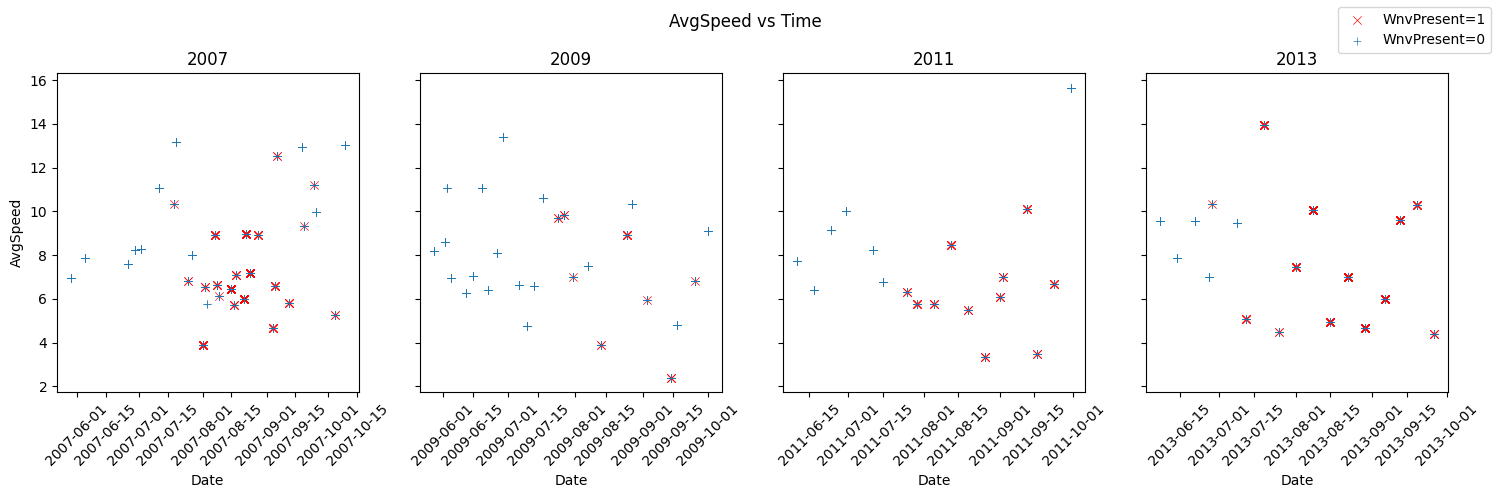

In [64]:
scatter('AvgSpeed')

In [65]:
wnv.columns

Index(['Trap', 'Block', 'Latitude', 'Longitude', 'Date', 'Species',
       'AddressAccuracy', 'NumMosquitos', 'Day_of_week', 'Day_of_month',
       'Week', 'Month', 'Year', 'Season', 'Month_Name', 'Sunrise', 'Sunset',
       'DaytimeLength', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'RelativeHumidity',
       'DewPointDepression', 'WetBulbDepression', 'WnvPresent'],
      dtype='object')

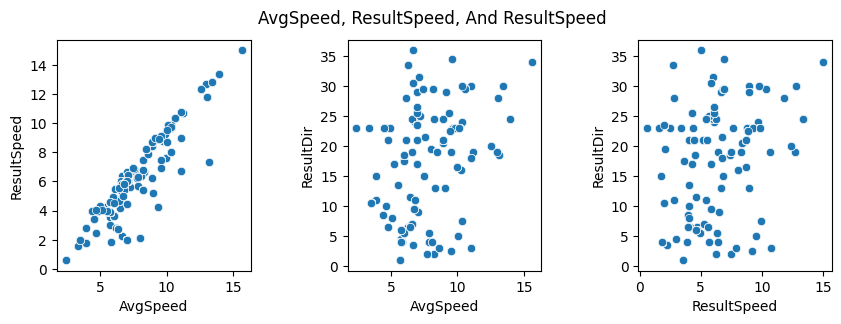

In [66]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
fig.suptitle('AvgSpeed, ResultSpeed, And ResultSpeed')
sns.scatterplot(x='AvgSpeed',y='ResultSpeed', data=wnv, ax=ax[0])
sns.scatterplot(x='AvgSpeed', y='ResultDir', data=wnv, ax=ax[1])
sns.scatterplot(x='ResultSpeed', y='ResultDir', data=wnv, ax=ax[2])
plt.subplots_adjust(wspace=0.5)

plt.savefig('../images/Speed_scatter.png', bbox_inches='tight')
plt.show()

There is a peak of cases at around `AvgSpeed`=6

#### DewPointDepression and WetBulbDepression

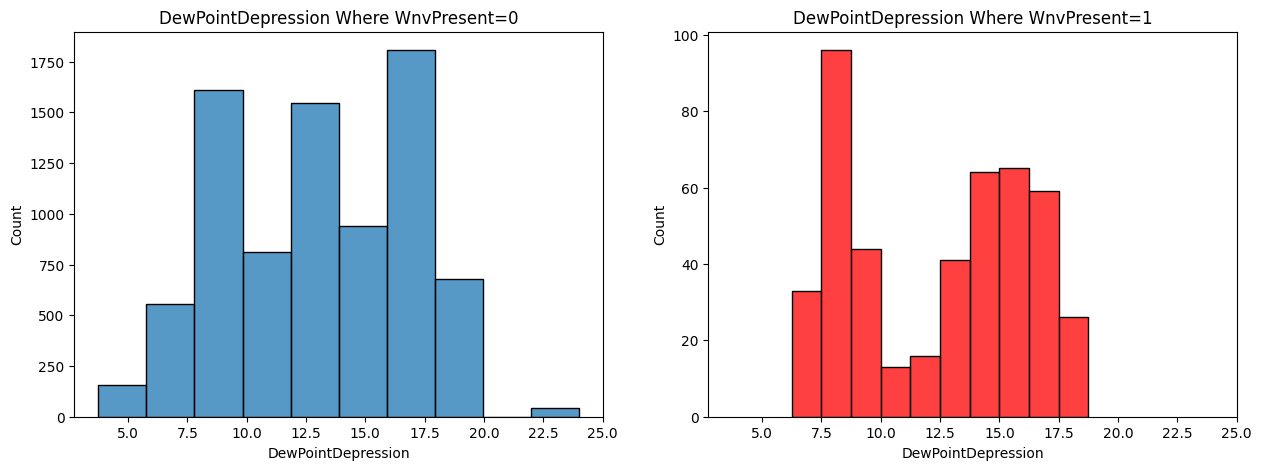

In [67]:
dual_histplot('DewPointDepression', bins=10)

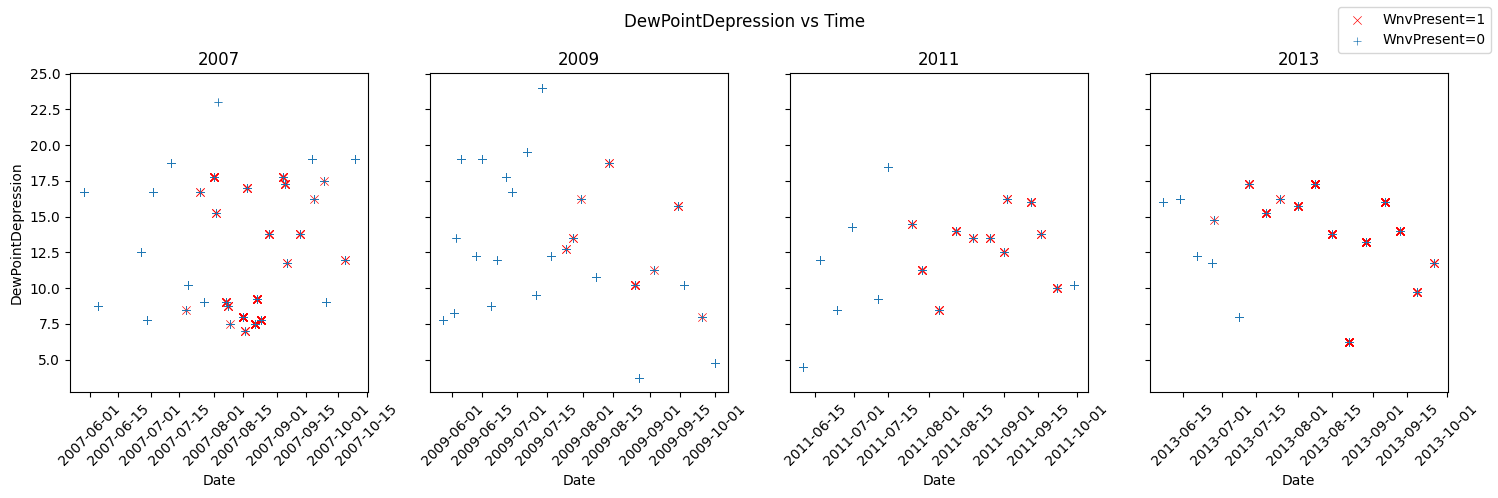

In [68]:
scatter('DewPointDepression')

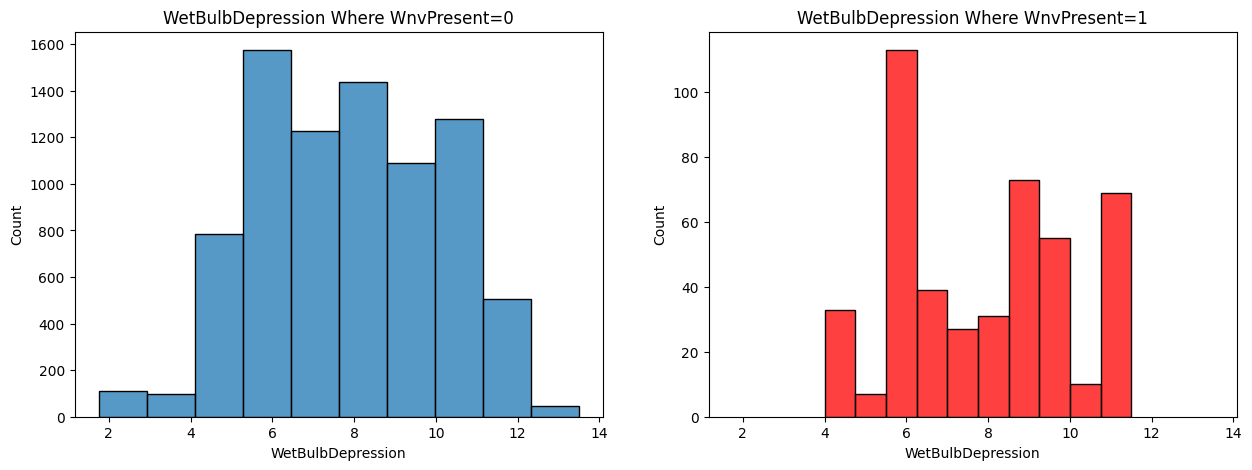

In [69]:
dual_histplot('WetBulbDepression', bins=10)

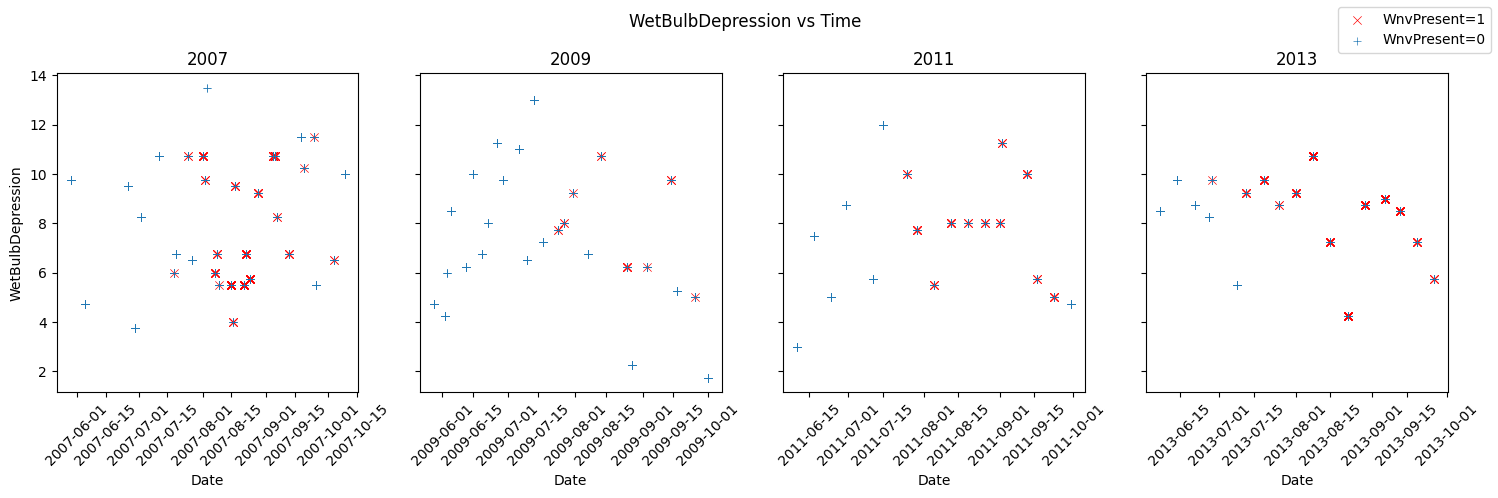

In [70]:
scatter('WetBulbDepression')

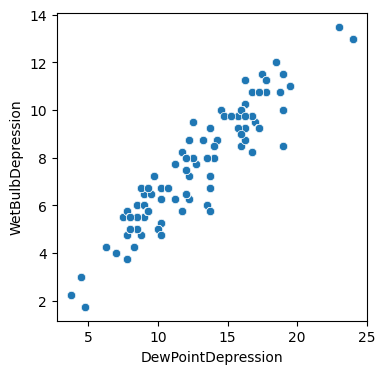

In [71]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(x='DewPointDepression',y='WetBulbDepression', data=wnv)
plt.show()

### Wnv and Seasonality

#### Annual

In [72]:
annual_count = wnv['Year'].value_counts()
annual_wnv = wnv.groupby('Year')['WnvPresent'].sum().sort_values(ascending=False)
annual_count = annual_count.to_frame().join(annual_wnv.to_frame())
annual_count = annual_count.rename(columns={'Year': 'Sample', 'WnvPresent': 'Wnv_sample'})
annual_count['Wnv_percent']=annual_count['Wnv_sample']*100/annual_count['Sample']
annual_count.reset_index(inplace=True)
annual_count = annual_count.rename(columns={'index': 'Year'})
group_annual = annual_count.copy()
annual_count

Year  Sample  Wnv_sample  Wnv_percent
0  2007    2837         189     6.661967
1  2013    2058         199     9.669582
2  2009    1921          19     0.989068
3  2011    1794          50     2.787068

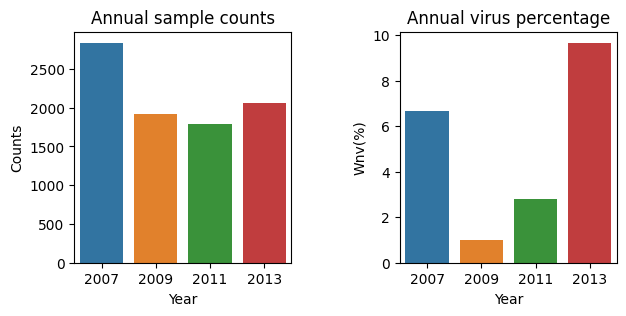

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3))
#plt.figsize=(2, 2)
g1=sns.barplot(x="Year", y="Sample", data=annual_count, ax=ax[0])
g1.set(ylabel='Counts')
g1.set(title="Annual sample counts")
g2=sns.barplot(x="Year", y="Wnv_percent", data=annual_count, ax=ax[1])
g2.set(ylabel='Wnv(%)')
plt.title("Annual virus percentage")
plt.subplots_adjust(wspace=0.5)

plt.savefig('../images/WNV_annual_percentage.png', bbox_inches='tight')
plt.show()

#### Seasonal

In [74]:
season_count = wnv['Season'].value_counts()
season_wnv = wnv.groupby('Season')['WnvPresent'].sum().sort_values(ascending=False)
season_count = season_count.to_frame().join(season_wnv.to_frame())
season_count = season_count.rename(columns={'Season': 'Sample', 'WnvPresent': 'Wnv_sample'})
season_count['Wnv_percent']=season_count['Wnv_sample']*100/season_count['Sample']
season_count.reset_index(inplace=True)
season_count = season_count.rename(columns={'index': 'Season'})
wnvgroup_seasonal = season_count.copy()
season_count

Season  Sample  Wnv_sample  Wnv_percent
0  Summer    6292         345     5.483153
1    Fall    2237         112     5.006705
2  Spring      81           0     0.000000

We can see that we don't have data for any of the winter months. It is likely that sample were not taken from the winter season since mosquitoes die off during the winter.

We also want to examine if there are differences in the seasons in the 4 years we have data on.

In [75]:
sy_count = wnv.groupby([(wnv['Year']),(wnv['Season'])])['Season'].count()
sy_wnv = wnv.groupby([(wnv['Year']),(wnv['Season'])])['WnvPresent'].sum()
#type(df_month_year_wnv)
sy_merge = pd.concat([sy_count, sy_wnv], axis=1)
sy_merge = sy_merge.rename(columns={'Season': 'Sample', 'WnvPresent': 'Wnv_sample'})
sy_merge['Wnv_percent'] = sy_merge['Wnv_sample']*100/sy_merge['Sample']
sy_merge.reset_index(inplace=True)
group_sy = sy_merge.copy()
sy_merge

Year  Season  Sample  Wnv_sample  Wnv_percent
0  2007    Fall     856          27     3.154206
1  2007  Spring      25           0     0.000000
2  2007  Summer    1956         162     8.282209
3  2009    Fall     445           5     1.123596
4  2009  Spring      56           0     0.000000
5  2009  Summer    1420          14     0.985915
6  2011    Fall     489          22     4.498978
7  2011  Summer    1305          28     2.145594
8  2013    Fall     447          58    12.975391
9  2013  Summer    1611         141     8.752328

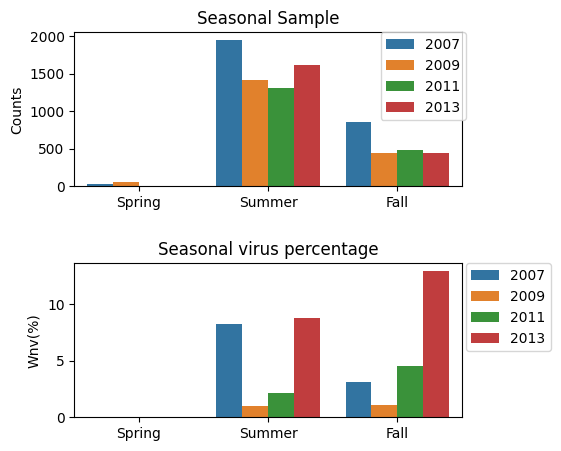

In [76]:
fig, ax = plt.subplots(2, 1, figsize=(5, 5))

g1=sns.barplot(x="Season", y="Sample",hue='Year', data=sy_merge, 
               order=['Spring','Summer', 'Fall'],ax=ax[0])
g1.set(title="Seasonal Sample")
g1.set(ylabel='Counts')
g1.set(xlabel=None)
g1.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.subplots_adjust(hspace=0.5)

g2=sns.barplot(x="Season", y="Wnv_percent",hue='Year', data=sy_merge, 
               order=['Spring','Summer', 'Fall'],ax=ax[1])
g2.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Seasonal virus percentage")
g2.set(ylabel='Wnv(%)')
g2.set(xlabel=None)

plt.savefig('../images/WNV_seasonal_percentage.png', bbox_inches='tight')
plt.show()

#### Monthly

In [77]:
month_count = wnv['Month_Name'].value_counts()
month_wnv = wnv.groupby('Month_Name')['WnvPresent'].sum().sort_values(ascending=False)
month_count = month_count.to_frame().join(month_wnv.to_frame())
month_count = month_count.rename(columns={'Month_Name': 'Sample', 'WnvPresent': 'Wnv_sample'})
month_count['Wnv_percent']=month_count['Wnv_sample']*100/month_count['Sample']
#month_count.reset_index(inplace=True)
#month_count = month_count.rename(columns={'index': 'Month_Name'})
month_group = month_count.copy()
month_count

Sample  Wnv_sample  Wnv_percent
Aug     2835         303    10.687831
July    2120          41     1.933962
Sep     1973         110     5.575266
June    1337           1     0.074794
Oct      264           2     0.757576
May       81           0     0.000000

In [78]:
month_year = wnv.groupby(['Year','Month_Name']).mean()[['Tavg','PrecipTotal']]
month_year_count = wnv.groupby(['Year', 'Month_Name', 'Month'])['Month_Name'].count()
month_year_wnvpresent = wnv.groupby(['Year', 'Month_Name', 'Month'])['WnvPresent'].sum()
merge1 = pd.concat([month_year_count, month_year_wnvpresent], axis=1)
merge1 = merge1.rename(columns={'Month_Name': 'Sample', 'WnvPresent': 'Wnv_sample'})
merge1['Wnv_percent'] = merge1['Wnv_sample']*100 / merge1['Sample']
merge2 = month_year.merge(merge1, how='outer', left_index=True, right_index=True)
merge2.reset_index(inplace=True)
group_monthly = merge2.copy()
merge2 = merge2.sort_values(["Year", "Month"],ascending = (True, True))
merge2

Year Month_Name  Month       Tavg  PrecipTotal  Sample  Wnv_sample  \
3   2007        May      5  75.250000     0.000000      25           0   
2   2007       June      6  68.045714     0.150026     175           0   
1   2007       July      7  72.748913     0.336450     460           3   
0   2007        Aug      8  78.337055     0.256885    1321         159   
5   2007        Sep      9  73.648473     0.008656     655          25   
4   2007        Oct     10  67.502488     0.000000     201           2   
9   2009        May      5  58.750000     0.000000      56           0   
8   2009       June      6  66.874200     0.472488     469           0   
7   2009       July      7  70.587881     0.037722     623           5   
6   2009        Aug      8  70.358232     0.260579     328           9   
11  2009        Sep      9  65.759162     0.026387     382           5   
10  2009        Oct     10  50.750000     0.740000      63           0   
14  2011       June      6  69.386943     0.073331     314           0   
13  2011       July      7  79.661381     0.180346     536          10   
12  2011        Aug      8  74.101099     0.000281     455          18   
15  2011        Sep      9  65.087423     0.016171     489          22   
18  2013       June      6  70.996042     0.253674     379           1   
17  2013       July      7  75.807385     0.213573     501          23   
16  2013        Aug      8  71.786936     0.061744     731         117   
19  2013        Sep      9  71.785235     0.108177     447          58   

    Wnv_percent  
3      0.000000  
2      0.000000  
1      0.652174  
0     12.036336  
5      3.816794  
4      0.995025  
9      0.000000  
8      0.000000  
7      0.802568  
6      2.743902  
11     1.308901  
10     0.000000  
14     0.000000  
13     1.865672  
12     3.956044  
15     4.498978  
18     0.263852  
17     4.590818  
16    16.005472  
19    12.975391

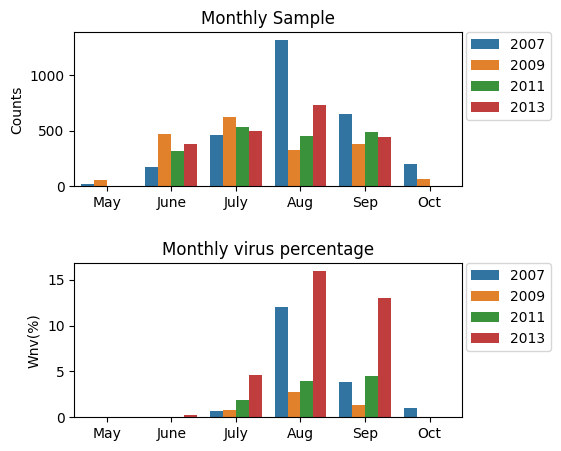

In [79]:
fig, ax = plt.subplots(2, 1, figsize=(5, 5))

g1 = sns.barplot(x="Month_Name", y="Sample",hue='Year', data=merge2, ax=ax[0])
g1.set(title="Monthly Sample")
g1.set(ylabel='Counts')
g1.set(xlabel=None)
g1.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.subplots_adjust(hspace=0.5)

g2 = sns.barplot(x="Month_Name", y="Wnv_percent",hue='Year', data=merge2, ax=ax[1])
g2.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Monthly virus percentage")
g2.set(ylabel='Wnv(%)')
g2.set(xlabel=None)

plt.savefig('../images/WNV_monthly_percentage.png', bbox_inches='tight')
plt.show()

#### Weekly

In [80]:
week_count = wnv['Week'].value_counts()
week_wnv = wnv.groupby('Week')['WnvPresent'].sum().sort_values(ascending=False)
week_count = week_count.to_frame().join(week_wnv.to_frame())
week_count = week_count.rename(columns={'Week': 'Sample', 'WnvPresent': 'Wnv_sample'})
week_count['Wnv_percent'] = week_count['Wnv_sample']*100 / week_count['Sample']
week_count.reset_index(inplace=True)
week_count = week_count.rename(columns={'index': 'Week'})
week_count.set_index(["Week"], inplace = True)
week_count.sort_values(by='Wnv_percent',ascending=False)

Sample  Wnv_sample  Wnv_percent
Week                                 
34       688         107    15.552326
35       367          47    12.806540
36       353          44    12.464589
33       612          66    10.784314
32       614          54     8.794788
37       489          34     6.952965
31       821          39     4.750305
29       474          15     3.164557
38       610          19     3.114754
30       578          16     2.768166
39       424           6     1.415094
28       824           7     0.849515
40       244           2     0.819672
26       408           1     0.245098
25       292           0     0.000000
24       283           0     0.000000
23       343           0     0.000000
27        85           0     0.000000
22        81           0     0.000000
41        20           0     0.000000

In [81]:
week_year_count = wnv.groupby(['Year', 'Month_Name', 'Week'])['Week'].count()
week_year_wnvpresent = wnv.groupby(['Year', 'Month_Name', 'Week'])['WnvPresent'].sum()
##type(df_month_year_wnv)
merge3 = pd.concat([week_year_count, week_year_wnvpresent], axis=1)
merge3 = merge3.rename(columns={'Week': 'Weekly_sample', 'WnvPresent': 'Wnv_count'})
merge3['Wnv_percent'] = merge3['Wnv_count']*100 / merge3['Weekly_sample']


week_year = wnv.groupby(['Year', 'Month_Name','Week']).mean()

merge4 = week_year.merge(merge3, how='outer', left_index=True, right_index=True)
merge4.reset_index(inplace=True)
group_weekly = merge4.copy()
merge4 = merge4.sort_values(["Year", "Week"],ascending = (True, True))
merge4.head()

Year Month_Name  Week      Block   Latitude  Longitude  AddressAccuracy  \
11  2007        May    22  36.240000  41.876884 -87.696170         7.920000   
9   2007       June    23  36.950000  41.882557 -87.716228         8.200000   
10  2007       June    26  39.530435  41.892123 -87.717668         8.217391   
5   2007       July    27  40.702703  41.886917 -87.717122         8.175676   
6   2007       July    28  41.200000  41.857346 -87.703538         8.264286   

    NumMosquitos  Day_of_week  Day_of_month  ...  ResultSpeed  ResultDir  \
11      1.600000          1.0          29.0  ...         5.80       17.0   
9       2.116667          1.0           5.0  ...         5.70        4.0   
10      2.617391          2.2          27.2  ...         7.02       13.7   
5       3.243243          0.0           2.0  ...         6.65       13.0   
6       7.878571          2.0          11.0  ...         8.95       30.0   

    AvgSpeed  RelativeHumidity  DewPointDepression  WetBulbDepression  \
11      6.95             56.04               16.75               9.75   
9       7.85             72.43                8.75               4.75   
10      7.86             69.87               10.60               7.20   
5       8.30             54.86               16.75               8.25   
6      11.05             51.35               18.75              10.75   

    WnvPresent  Weekly_sample  Wnv_count  Wnv_percent  
11         0.0             25          0          0.0  
9          0.0             60          0          0.0  
10         0.0            115          0          0.0  
5          0.0             74          0          0.0  
6          0.0            140          0          0.0  

[5 rows x 33 columns]

In [82]:
merge4.columns

Index(['Year', 'Month_Name', 'Week', 'Block', 'Latitude', 'Longitude',
       'AddressAccuracy', 'NumMosquitos', 'Day_of_week', 'Day_of_month',
       'Month', 'DaytimeLength', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'RelativeHumidity',
       'DewPointDepression', 'WetBulbDepression', 'WnvPresent',
       'Weekly_sample', 'Wnv_count', 'Wnv_percent'],
      dtype='object')

In [83]:
date_wnvpresent = wnv[['Date','WnvPresent']]
date_wnvpresent.set_index(['Date'],inplace=True)
date_wnvpresent.info()
y = date_wnvpresent['WnvPresent'].resample('W').sum()
z = date_wnvpresent['WnvPresent'].resample('W').count()
weekly_percent = y.divide(z).multiply(100)
weekly_percent.fillna(0,inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8610 entries, 2007-06-26 to 2013-09-12
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   WnvPresent  8610 non-null   int64
dtypes: int64(1)
memory usage: 134.5 KB


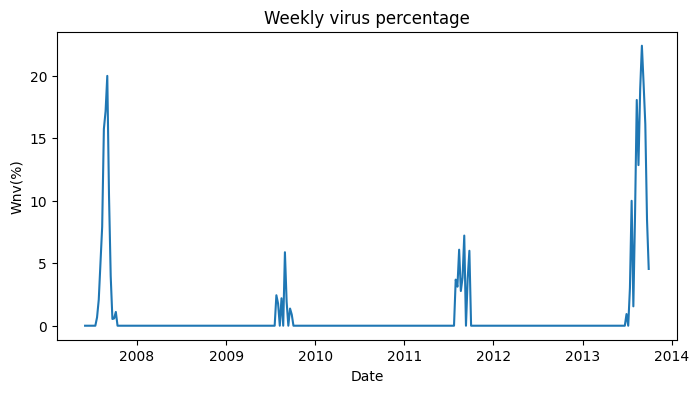

In [84]:
plt.figure(figsize=(8,4))
plt.plot(weekly_percent)
plt.title('Weekly virus percentage')
plt.xlabel('Date')
plt.ylabel('Wnv(%)')

plt.savefig('../images/WNV_weekly_percentage.png', bbox_inches='tight')
plt.show()

#### Daily

In [85]:
y = date_wnvpresent['WnvPresent'].resample('D').sum()
z = date_wnvpresent['WnvPresent'].resample('D').count()
daily_percent = y.divide(z).multiply(100)
daily_percent.fillna(0,inplace=True)

<Figure size 1200x800 with 0 Axes>

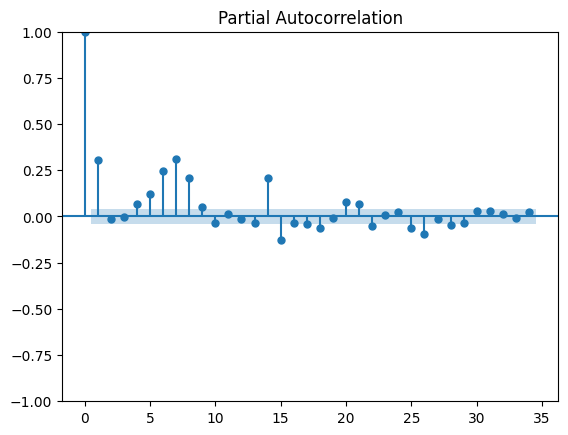

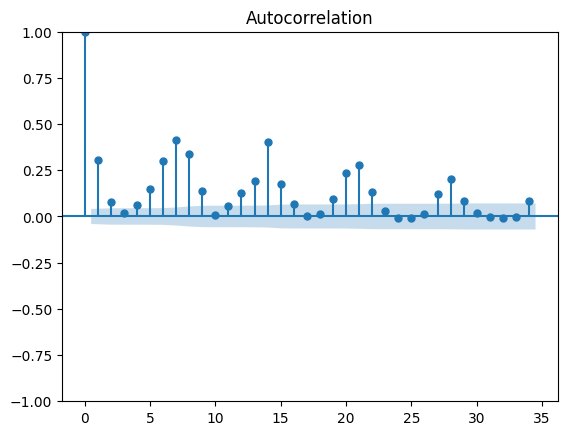

In [86]:
# daily autocorrelation and partial autocorrelation
plt.figure(figsize=(12,8))
plot_pacf(daily_percent, method='ywm')
plt.savefig('../images/Daily_pacf.png', bbox_inches='tight')

plot_acf(daily_percent)
plt.savefig('../images/Daily_acf.png', bbox_inches='tight')

plt.show()

#### Bayesian Information Criterion

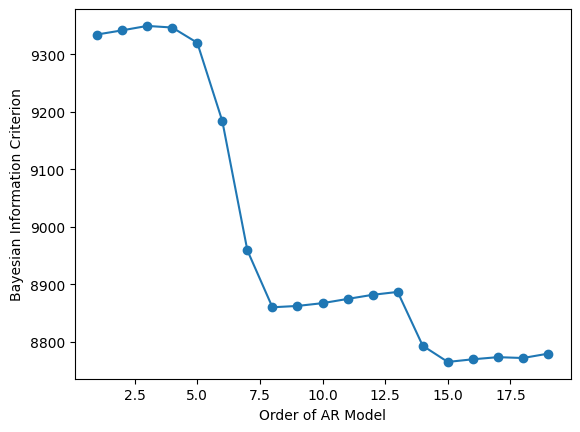

In [87]:
# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC 
bic = np.zeros(22)
bic_aic= np.zeros(22)
for p in range(22):
    mod = ARIMA(daily_percent, order=(p,0,0)) 
    res = mod.fit()
    # Save BIC for AR(p)
    bic[p] = res.bic
    bic_aic[p] = res.aic # Plot the BIC as a function of p 

plt.plot(range(1,20), bic[1:20], marker='o') 
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')

plt.savefig('../images/BIC.png', bbox_inches='tight')
plt.show()

In [88]:
# Finding an optimized day lag
sevenday_lag = daily_percent.diff(7)
sevenday_lag.fillna(0,inplace=True)
fourteenday_lag = daily_percent.diff(14)
fourteenday_lag.fillna(0,inplace=True)
twentyoneday_lag = daily_percent.diff(21)
twentyoneday_lag.fillna(0,inplace=True)

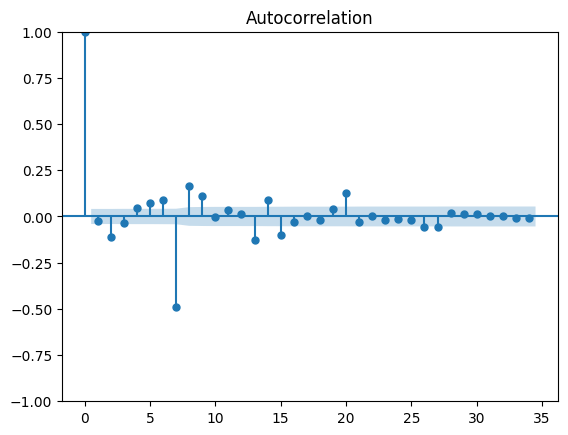

In [89]:
plot_acf(daily_percent.diff(7).dropna())

plt.savefig('../images/sevendaylag_acf.png', bbox_inches='tight')
plt.show()

In [90]:
# create a lag dataframe
frame = { 'Sevenday_lag': sevenday_lag,
         'Fourteenday_lag': fourteenday_lag,
         'Twentyoneday_lag': twentyoneday_lag }  
wnv_lag = pd.DataFrame(frame) 
print(wnv_lag.head())
print(wnv_lag.shape)

            Sevenday_lag  Fourteenday_lag  Twentyoneday_lag
Date                                                       
2007-05-29           0.0              0.0               0.0
2007-05-30           0.0              0.0               0.0
2007-05-31           0.0              0.0               0.0
2007-06-01           0.0              0.0               0.0
2007-06-02           0.0              0.0               0.0
(2313, 3)


In [91]:
group_annual.drop(columns=['Sample','Wnv_sample'],inplace=True)
group_annual

Year  Wnv_percent
0  2007     6.661967
1  2013     9.669582
2  2009     0.989068
3  2011     2.787068

In [92]:
group_sy.drop(columns=['Sample','Wnv_sample'],inplace=True)
group_sy

Year  Season  Wnv_percent
0  2007    Fall     3.154206
1  2007  Spring     0.000000
2  2007  Summer     8.282209
3  2009    Fall     1.123596
4  2009  Spring     0.000000
5  2009  Summer     0.985915
6  2011    Fall     4.498978
7  2011  Summer     2.145594
8  2013    Fall    12.975391
9  2013  Summer     8.752328

In [93]:
group_monthly.drop(columns=['Month','Tavg','PrecipTotal','Sample','Wnv_sample'],inplace=True)
group_monthly

Year Month_Name  Wnv_percent
0   2007        Aug    12.036336
1   2007       July     0.652174
2   2007       June     0.000000
3   2007        May     0.000000
4   2007        Oct     0.995025
5   2007        Sep     3.816794
6   2009        Aug     2.743902
7   2009       July     0.802568
8   2009       June     0.000000
9   2009        May     0.000000
10  2009        Oct     0.000000
11  2009        Sep     1.308901
12  2011        Aug     3.956044
13  2011       July     1.865672
14  2011       June     0.000000
15  2011        Sep     4.498978
16  2013        Aug    16.005472
17  2013       July     4.590818
18  2013       June     0.263852
19  2013        Sep    12.975391

In [94]:
group_weekly.columns

Index(['Year', 'Month_Name', 'Week', 'Block', 'Latitude', 'Longitude',
       'AddressAccuracy', 'NumMosquitos', 'Day_of_week', 'Day_of_month',
       'Month', 'DaytimeLength', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'RelativeHumidity',
       'DewPointDepression', 'WetBulbDepression', 'WnvPresent',
       'Weekly_sample', 'Wnv_count', 'Wnv_percent'],
      dtype='object')

In [95]:
group_weekly.drop(columns=['Month_Name', 'Block', 'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos',
                          'WnvPresent', 'Depart', 'DaytimeLength', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb',
                          'Heat', 'Cool', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
                          'AvgSpeed', 'RelativeHumidity', 'WetBulbDepression', 'DewPointDepression', 'Day_of_week',
                           'Day_of_month', 'Month', 'Weekly_sample', 'Wnv_count'], inplace=True)
group_weekly

Year  Week  Wnv_percent
0   2007    31     4.904632
1   2007    32     7.906977
2   2007    33    15.750916
3   2007    34    17.169374
4   2007    35    20.000000
..   ...   ...          ...
60  2013    26     0.934579
61  2013    36    19.379845
62  2013    37    16.129032
63  2013    38     8.490566
64  2013    39     4.545455

[65 rows x 3 columns]

In [96]:
# merge wnv, group_annual, group_sy, group_monthly, group_weekly, 
group_annual.rename(columns={"Wnv_percent": "Wnv_percent_yearly"}, inplace=True)
df1 = pd.merge(wnv, group_annual,  how='left', left_on=['Year'], right_on = ['Year'])

group_sy.rename(columns={"Wnv_percent": "Wnv_percent_seasonal"}, inplace=True)
df2 = pd.merge(df1, group_sy,  how='left', left_on=['Year','Season'], 
                   right_on = ['Year','Season'])

group_monthly.rename(columns={"Wnv_percent": "Wnv_percent_monthly"}, inplace=True)
df3 = pd.merge(df2, group_monthly,  how='left', left_on=['Year','Month_Name'], 
                   right_on = ['Year','Month_Name'])

group_weekly.rename(columns={"Wnv_percent": "Wnv_percent_weekly"}, inplace=True)
df4 = pd.merge(df3, group_weekly,  how='left', left_on=['Year','Week'], 
                    right_on = ['Year','Week'])

df5 = pd.merge(df4, wnv_lag,  how='left', left_on=['Date'], right_on = ['Date'])
df5.head()

Trap  Block   Latitude  Longitude       Date                 Species  \
0  T001     40  41.953705 -87.733974 2007-06-26  CULEX PIPIENS/RESTUANS   
1  T001     40  41.953705 -87.733974 2007-07-11  CULEX PIPIENS/RESTUANS   
2  T001     40  41.953705 -87.733974 2007-07-18           CULEX PIPIENS   
3  T001     40  41.953705 -87.733974 2007-08-01           CULEX PIPIENS   
4  T001     40  41.953705 -87.733974 2007-08-01  CULEX PIPIENS/RESTUANS   

   AddressAccuracy  NumMosquitos  Day_of_week  Day_of_month  ...  \
0                8             1            1            26  ...   
1                8             1            2            11  ...   
2                8             1            2            18  ...   
3                8             1            2             1  ...   
4                8             3            2             1  ...   

   DewPointDepression  WetBulbDepression  WnvPresent Wnv_percent_yearly  \
0               12.50               9.50           0           6.661967   
1               18.75              10.75           0           6.661967   
2                8.50               6.00           0           6.661967   
3               17.75              10.75           0           6.661967   
4               17.75              10.75           0           6.661967   

  Wnv_percent_seasonal Wnv_percent_monthly Wnv_percent_weekly  Sevenday_lag  \
0             8.282209            0.000000           0.000000      0.000000   
1             8.282209            0.652174           0.000000      0.000000   
2             8.282209            0.652174           0.666667      0.862069   
3             8.282209           12.036336           4.904632     -8.985361   
4             8.282209           12.036336           4.904632     -8.985361   

   Fourteenday_lag  Twentyoneday_lag  
0         0.000000          0.000000  
1         0.000000          0.000000  
2         0.862069          0.862069  
3         4.438284          5.300353  
4         4.438284          5.300353  

[5 rows x 43 columns]

In [97]:
# list of features
features = [x for x in merge4.columns if x not in ['Block','Day_of_week', 'Day_of_month', 'Week', 'Month', 'Year', 
                                                   'Season','Monthofyear','WnvPresent','Wnv_count','Wnv_percent']]
features

['Month_Name',
 'Latitude',
 'Longitude',
 'AddressAccuracy',
 'NumMosquitos',
 'DaytimeLength',
 'Tmax',
 'Tmin',
 'Tavg',
 'Depart',
 'DewPoint',
 'WetBulb',
 'Heat',
 'Cool',
 'PrecipTotal',
 'StnPressure',
 'SeaLevel',
 'ResultSpeed',
 'ResultDir',
 'AvgSpeed',
 'RelativeHumidity',
 'DewPointDepression',
 'WetBulbDepression',
 'Weekly_sample']

In [98]:
def scatterplots(columns, ncol=None,figsize=(15,15)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.5)

    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Wnv_percent', data=merge4, alpha=0.5)
        ax.set(xlabel=col, ylabel='Wnv(%)')
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.xaxis.label.set_size(12)
        ax.yaxis.label.set_size(12)
        
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

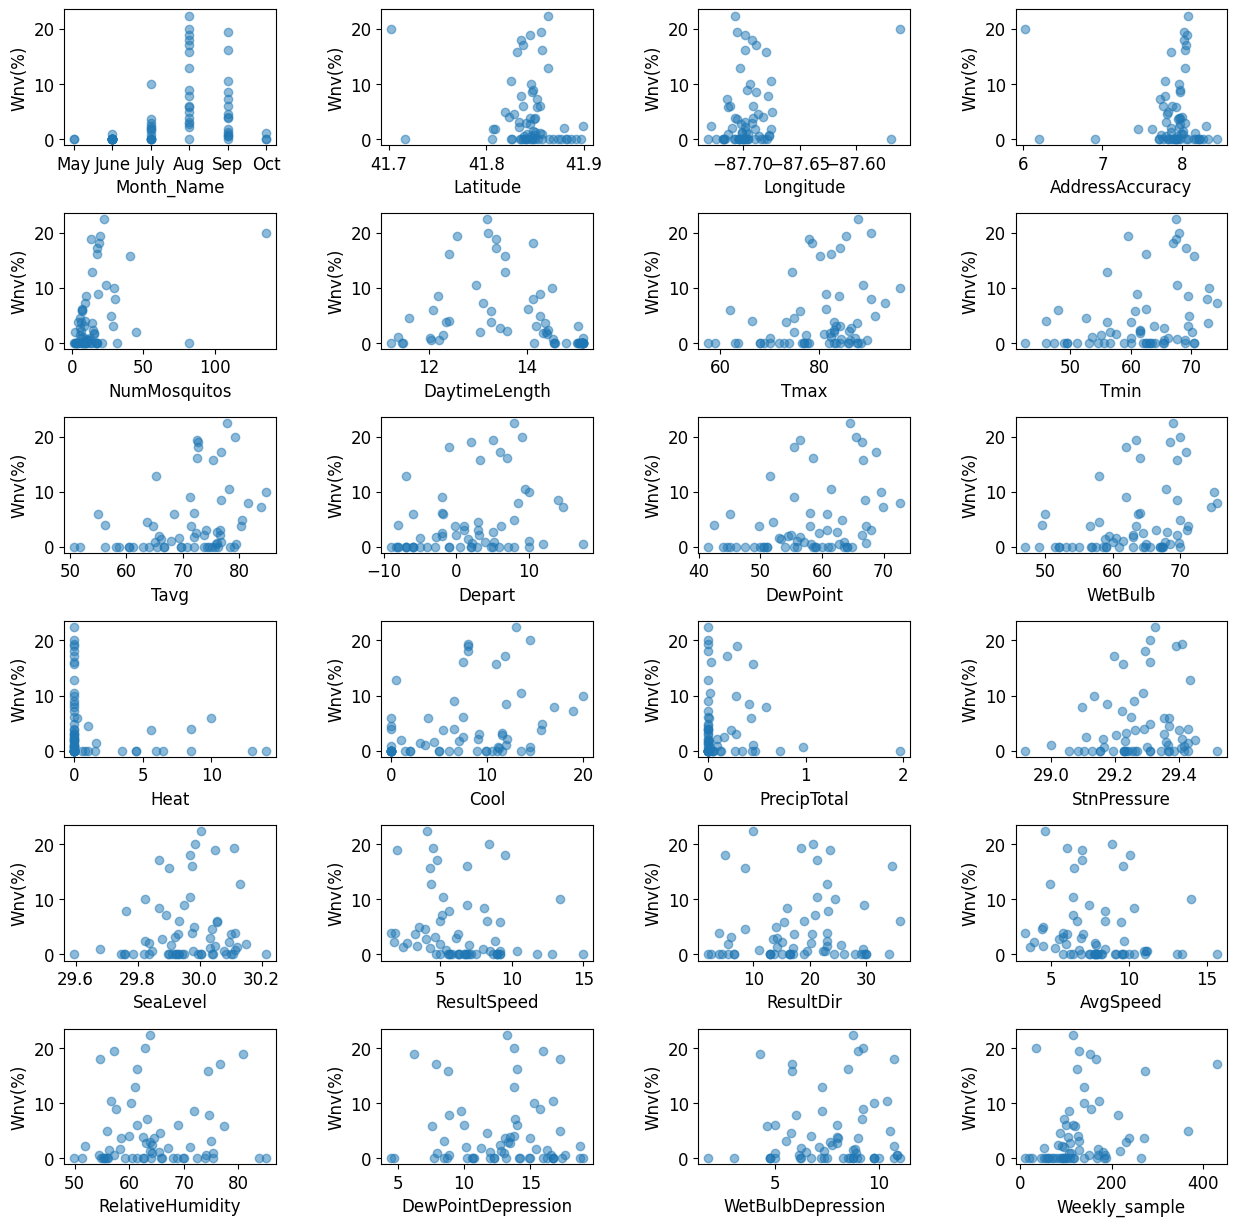

In [99]:
scatterplots(features, ncol=4, figsize=(15,15))
plt.savefig('../images/features_scatter.png', bbox_inches='tight')

### Cleaning df5

In [100]:
df5.isnull().sum()

Trap                    0
Block                   0
Latitude                0
Longitude               0
Date                    0
Species                 0
AddressAccuracy         0
NumMosquitos            0
Day_of_week             0
Day_of_month            0
Week                    0
Month                   0
Year                    0
Season                  0
Month_Name              0
Sunrise                 0
Sunset                  0
DaytimeLength           0
Tmax                    0
Tmin                    0
Tavg                    0
Depart                  0
DewPoint                0
WetBulb                 0
Heat                    0
Cool                    0
PrecipTotal             0
StnPressure             0
SeaLevel                0
ResultSpeed             0
ResultDir               0
AvgSpeed                0
RelativeHumidity        0
DewPointDepression      0
WetBulbDepression       0
WnvPresent              0
Wnv_percent_yearly      0
Wnv_percent_seasonal    0
Wnv_percent_

In [101]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8610 entries, 0 to 8609
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Trap                  8610 non-null   object         
 1   Block                 8610 non-null   int64          
 2   Latitude              8610 non-null   float64        
 3   Longitude             8610 non-null   float64        
 4   Date                  8610 non-null   datetime64[ns] 
 5   Species               8610 non-null   object         
 6   AddressAccuracy       8610 non-null   int64          
 7   NumMosquitos          8610 non-null   int64          
 8   Day_of_week           8610 non-null   int64          
 9   Day_of_month          8610 non-null   int64          
 10  Week                  8610 non-null   int64          
 11  Month                 8610 non-null   int64          
 12  Year                  8610 non-null   int64          
 13  Sea

We have found some features that are highly correlated. We will drop them but only keep one of them. The highly correlated features are:
- Tmax, Tmin, Tavg
- Tavg, WetBulb
- DewPoint, WetBulb
- ResultSpeed, AvgSpeed
- WetBulbDepression, DewPointDepression

In [102]:
columns_to_drop = ['Tmax', 'Tmin', 'DewPoint', 'StnPressure', 'AvgSpeed', 'WetBulbDepression', 'WetBulb' ]
df = df5.drop(columns=columns_to_drop)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8610 entries, 0 to 8609
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Trap                  8610 non-null   object         
 1   Block                 8610 non-null   int64          
 2   Latitude              8610 non-null   float64        
 3   Longitude             8610 non-null   float64        
 4   Date                  8610 non-null   datetime64[ns] 
 5   Species               8610 non-null   object         
 6   AddressAccuracy       8610 non-null   int64          
 7   NumMosquitos          8610 non-null   int64          
 8   Day_of_week           8610 non-null   int64          
 9   Day_of_month          8610 non-null   int64          
 10  Week                  8610 non-null   int64          
 11  Month                 8610 non-null   int64          
 12  Year                  8610 non-null   int64          
 13  Sea

In [104]:
# examine object type columns
df.select_dtypes('object').columns

Index(['Trap', 'Species', 'Season', 'Month_Name'], dtype='object')

We know that `Latitude` and `Longitude` can be used to determine an specific trap, so we can drop the `Trap` column. We can also get rid of the `Sunrise` and `Sunset` columns since they are closely linked to date. Since we also split the date into seperate  `Day_of_month`, `Month`, and `Year` columns, we can drop the `Date` column.

In [105]:
cols_to_drop=['Date', 'Trap', 'Sunrise', 'Sunset']
df = df.drop(columns=cols_to_drop)

In [106]:
df_encoded = pd.get_dummies(df, columns=['Species','Season','Month_Name'])
df_encoded.columns

Index(['Block', 'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos',
       'Day_of_week', 'Day_of_month', 'Week', 'Month', 'Year', 'DaytimeLength',
       'Tavg', 'Depart', 'Heat', 'Cool', 'PrecipTotal', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'RelativeHumidity', 'DewPointDepression',
       'WnvPresent', 'Wnv_percent_yearly', 'Wnv_percent_seasonal',
       'Wnv_percent_monthly', 'Wnv_percent_weekly', 'Sevenday_lag',
       'Fourteenday_lag', 'Twentyoneday_lag', 'Species_CULEX ERRATICUS',
       'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS',
       'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS',
       'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS', 'Season_Fall',
       'Season_Spring', 'Season_Summer', 'Month_Name_Aug', 'Month_Name_July',
       'Month_Name_June', 'Month_Name_May', 'Month_Name_Oct',
       'Month_Name_Sep'],
      dtype='object')

In [107]:
# drop species were the virus was not present
# drop month where virus was not present (May)
cols_to_drop = ['Species_CULEX TERRITANS',
                'Species_CULEX SALINARIUS',
                'Species_CULEX TARSALIS',
                'Species_CULEX ERRATICUS',
                'Month_Name_May' ]
df_encoded = df_encoded.drop(columns=cols_to_drop)
df_encoded.columns

Index(['Block', 'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos',
       'Day_of_week', 'Day_of_month', 'Week', 'Month', 'Year', 'DaytimeLength',
       'Tavg', 'Depart', 'Heat', 'Cool', 'PrecipTotal', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'RelativeHumidity', 'DewPointDepression',
       'WnvPresent', 'Wnv_percent_yearly', 'Wnv_percent_seasonal',
       'Wnv_percent_monthly', 'Wnv_percent_weekly', 'Sevenday_lag',
       'Fourteenday_lag', 'Twentyoneday_lag', 'Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS',
       'Season_Fall', 'Season_Spring', 'Season_Summer', 'Month_Name_Aug',
       'Month_Name_July', 'Month_Name_June', 'Month_Name_Oct',
       'Month_Name_Sep'],
      dtype='object')

In [108]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8610 entries, 0 to 8609
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Block                           8610 non-null   int64  
 1   Latitude                        8610 non-null   float64
 2   Longitude                       8610 non-null   float64
 3   AddressAccuracy                 8610 non-null   int64  
 4   NumMosquitos                    8610 non-null   int64  
 5   Day_of_week                     8610 non-null   int64  
 6   Day_of_month                    8610 non-null   int64  
 7   Week                            8610 non-null   int64  
 8   Month                           8610 non-null   int64  
 9   Year                            8610 non-null   int64  
 10  DaytimeLength                   8610 non-null   float64
 11  Tavg                            8610 non-null   float64
 12  Depart                          86

In [109]:
# round float64 columns of df_encoded
cols = list(df_encoded.columns)

for col in cols:
    if df_encoded[col].dtype == 'float64':
        df_encoded[col] = round(df_encoded[col], 6)  

### Final Correlation Plot

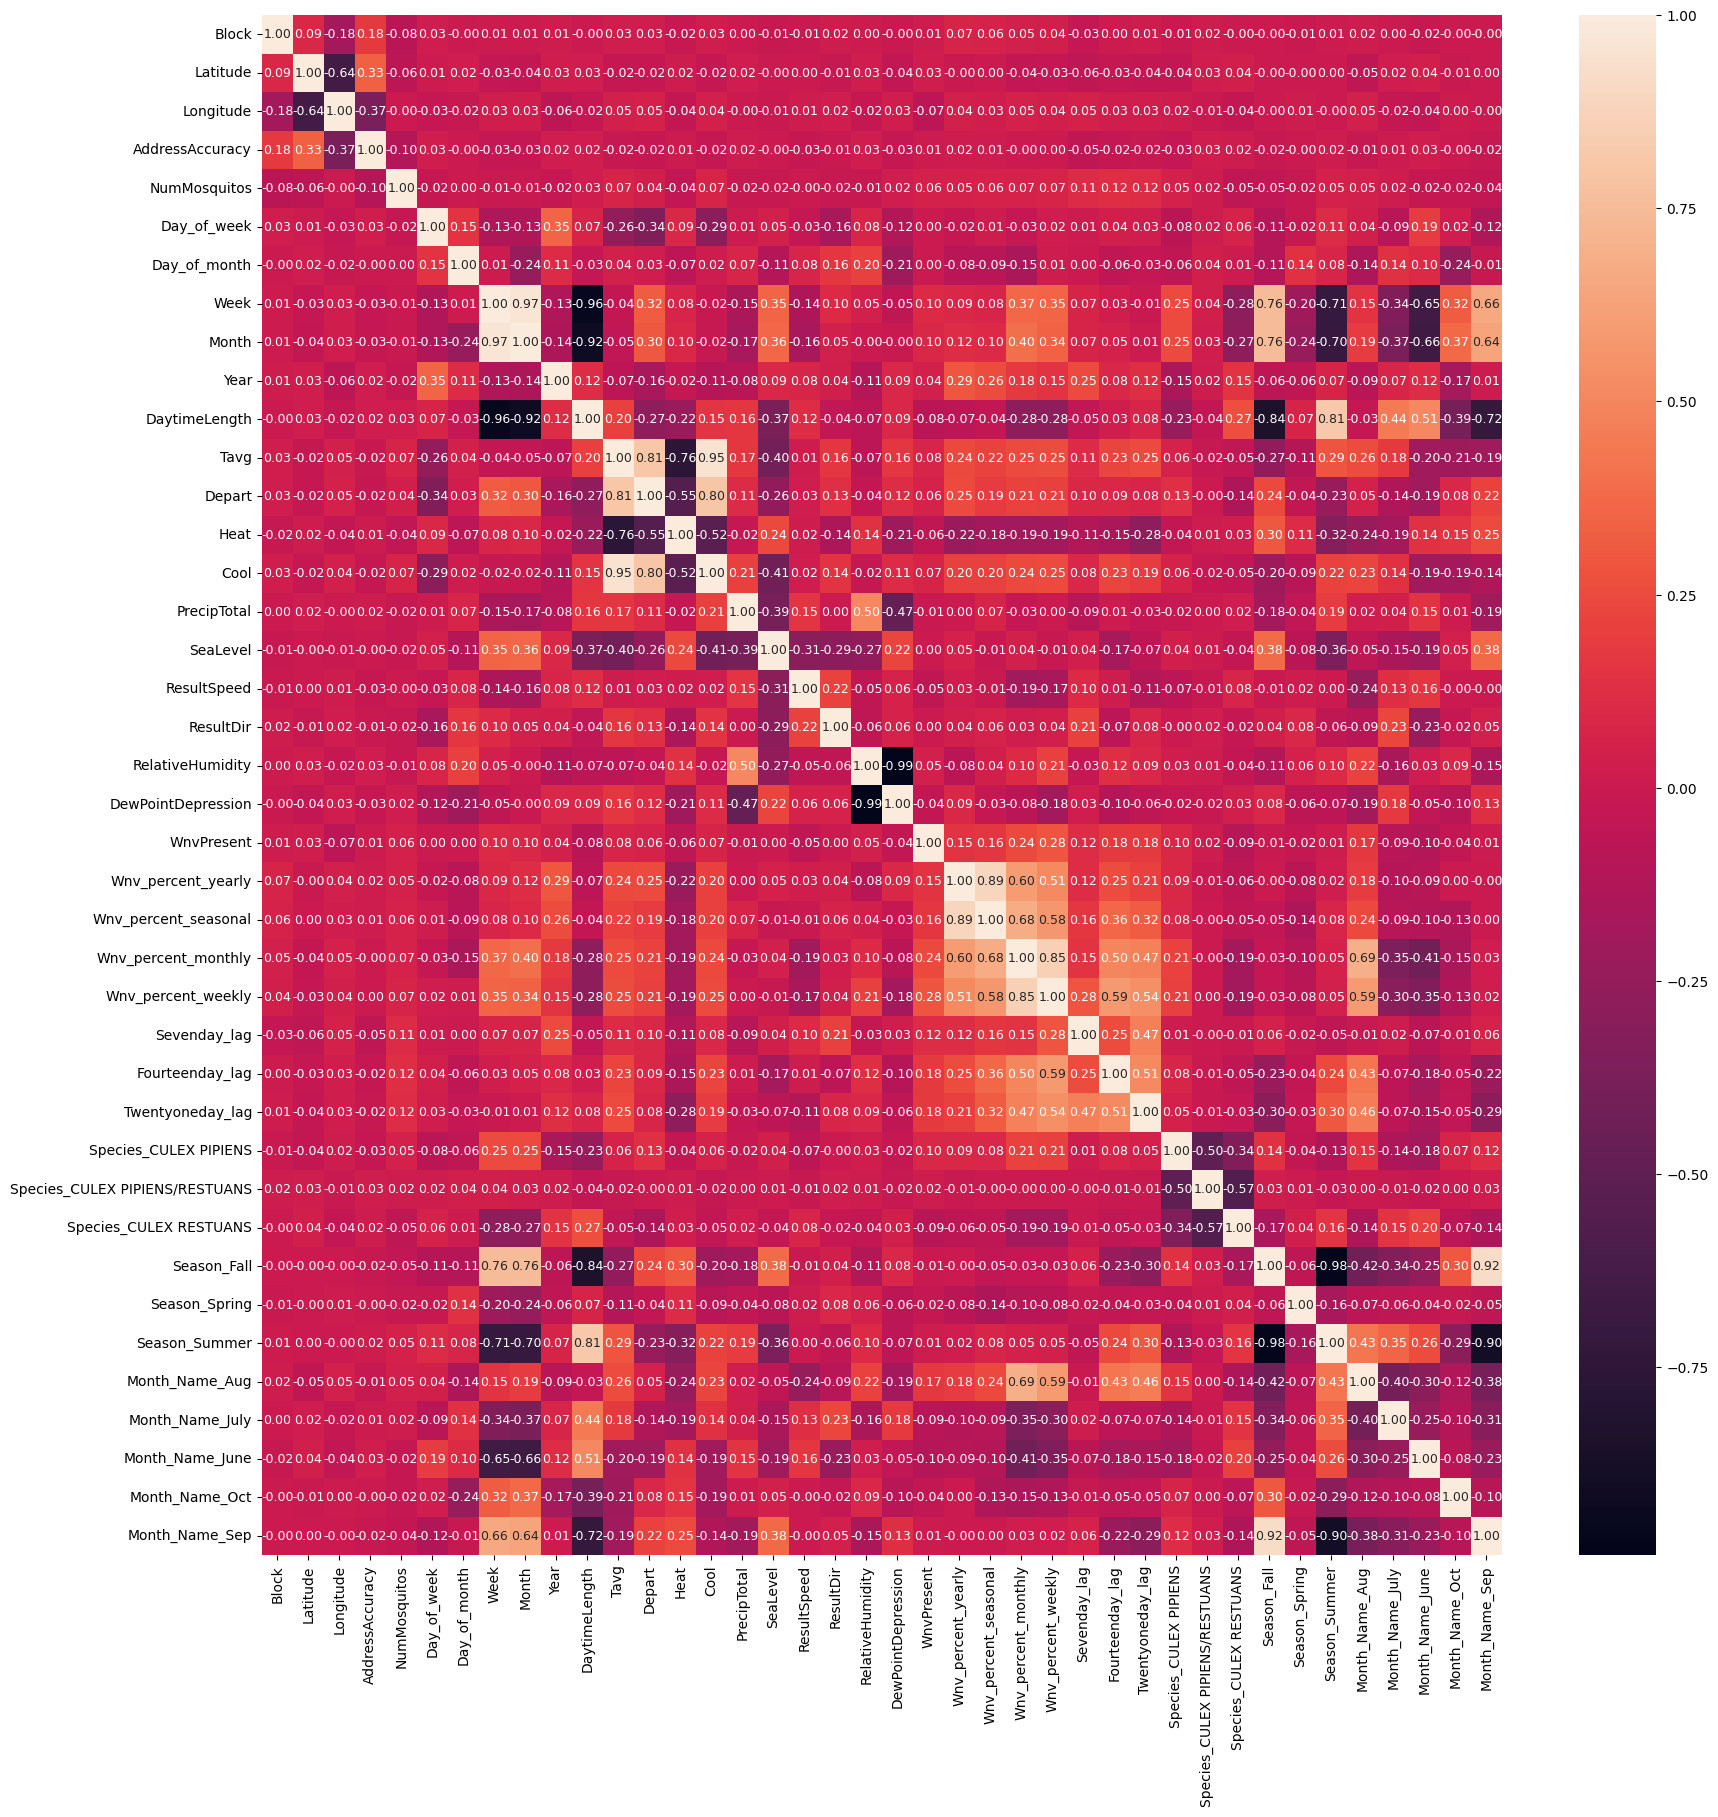

In [110]:
plt.subplots(figsize=(20,20))
corr = df_encoded.corr(method='pearson')
ax = sns.heatmap(corr, annot=True,annot_kws={'size':9}, fmt=".2f")

Looking at this correlation plot, we can see that things seem to be on par with what we have found so far.

In [111]:
# WnvPresent value counts
df_encoded['WnvPresent'].value_counts(normalize=True)

0    0.946922
1    0.053078
Name: WnvPresent, dtype: float64

In [112]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8610 entries, 0 to 8609
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Block                           8610 non-null   int64  
 1   Latitude                        8610 non-null   float64
 2   Longitude                       8610 non-null   float64
 3   AddressAccuracy                 8610 non-null   int64  
 4   NumMosquitos                    8610 non-null   int64  
 5   Day_of_week                     8610 non-null   int64  
 6   Day_of_month                    8610 non-null   int64  
 7   Week                            8610 non-null   int64  
 8   Month                           8610 non-null   int64  
 9   Year                            8610 non-null   int64  
 10  DaytimeLength                   8610 non-null   float64
 11  Tavg                            8610 non-null   float64
 12  Depart                          86

Another thing to keep in mind that the vast majority of the entries show the virus is absent. The cases between the presence and the absence of the virus are not evenly distributed.

In [113]:
# save data to a new .csv file
datapath = '../data'
save_file(df_encoded, 'WestNileVirus_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/WestNileVirus_cleaned.csv"
